# imports

In [82]:
import pandas as pd
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import data_io
import os
import utils
from tqdm import tqdm
from collections import Counter
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk


# FakeNewsNet Dataset

In [2]:
gossip_fake = data_io.load_csv(r'data/FakeNewsNet/gossipcop_fake.csv')
gossip_real = data_io.load_csv(r'data/FakeNewsNet/gossipcop_real.csv')
political_fake = data_io.load_csv(r'data/FakeNewsNet/politifact_fake.csv')
political_real = data_io.load_csv(r'data/FakeNewsNet/politifact_real.csv')
gossip_fake["label"] = 0
gossip_fake["category"] = "gossip"
gossip_real["label"] = 1
gossip_real["category"] = "gossip"
political_fake["label"] = 0
political_fake["category"] = "political"
political_real["label"] = 1
political_real["category"] = "political"
FakeNewsNet = pd.concat([gossip_fake, gossip_real, political_fake, political_real], ignore_index=True)

In [3]:
FakeNewsNet.describe()

label
count  23196.000000
mean       0.751897
std        0.431921
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000

In [4]:
FakeNewsNet.isnull().sum()

id              0
news_url      330
title           0
tweet_ids    1501
label           0
category        0
dtype: int64

In [5]:
FakeNewsNet.head()

id                                           news_url  \
0  gossipcop-2493749932  www.dailymail.co.uk/tvshowbiz/article-5874213/...   
1  gossipcop-4580247171  hollywoodlife.com/2018/05/05/paris-jackson-car...   
2   gossipcop-941805037  variety.com/2017/biz/news/tax-march-donald-tru...   
3  gossipcop-2547891536  www.dailymail.co.uk/femail/article-3499192/Do-...   
4  gossipcop-5476631226  variety.com/2018/film/news/list-2018-oscar-nom...   

                                               title  \
0  Did Miley Cyrus and Liam Hemsworth secretly ge...   
1  Paris Jackson & Cara Delevingne Enjoy Night Ou...   
2  Celebrities Join Tax March in Protest of Donal...   
3  Cindy Crawford's daughter Kaia Gerber wears a ...   
4      Full List of 2018 Oscar Nominations – Variety   

                                           tweet_ids  label category  
0  284329075902926848\t284332744559968256\t284335...      0   gossip  
1  992895508267130880\t992897935418503169\t992899...      0   gossip  
2  853359353532829696\t853359576543920128\t853359...      0   gossip  
3  988821905196158981\t988824206556172288\t988825...      0   gossip  
4  955792793632432131\t955795063925301249\t955798...      0   gossip

#### key words

In [7]:
fake_df = FakeNewsNet[FakeNewsNet['label'] == 0]

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text) 
    return text

all_titles = ' '.join(fake_df['title'].dropna().apply(clean_text))

words = all_titles.split()
word_counts = Counter(words)

print("🔝 Top 20 words in FAKE news titles:")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")


🔝 Top 20 words in FAKE news titles:
to: 1337
and: 1191
the: 1026
with: 757
is: 721
of: 686
a: 686
in: 646
on: 592
for: 563
jennifer: 479
her: 458
kardashian: 422
brad: 411
after: 354
justin: 351
pitt: 351
jenner: 347
about: 310
not: 303


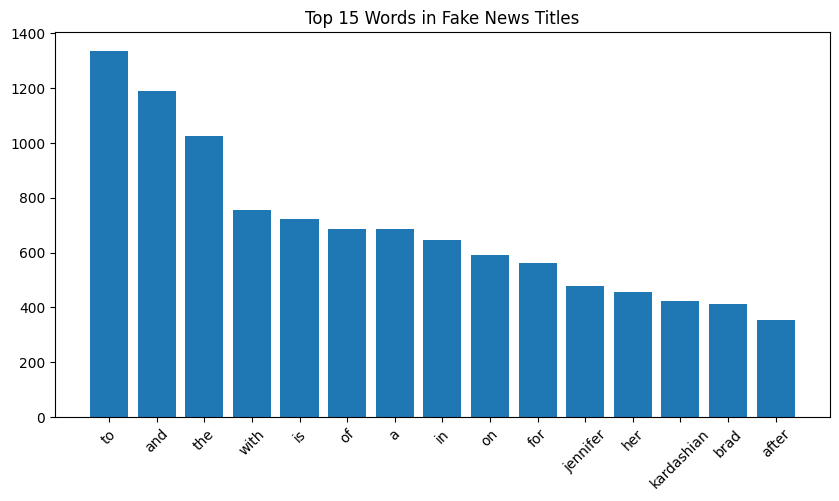

In [8]:
top_words = word_counts.most_common(15)
words_plot, counts = zip(*top_words)

plt.figure(figsize=(10,5))
plt.bar(words_plot, counts)
plt.title("Top 15 Words in Fake News Titles")
plt.xticks(rotation=45)
plt.show()


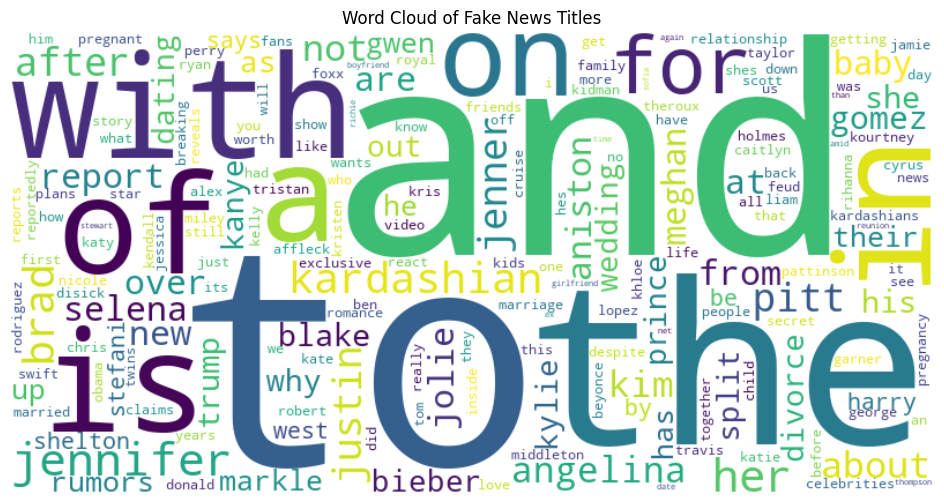

In [10]:
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Fake News Titles")
plt.show()


# therealsampat Dataset

In [ ]:
fake_news = data_io.load_csv(r'data/therealsampat/Fake.csv')
true_news = data_io.load_csv(r'data/therealsampat/True.csv')
fake_news["label"] = 0
true_news["label"] = 1
fake_true_dataset = pd.concat([fake_news, true_news], ignore_index=True)

In [23]:
fake_true_dataset.describe()

label
count  44898.000000
mean       0.477015
std        0.499477
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000

In [24]:
fake_true_dataset.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [14]:
fake_true_dataset.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0

<Figure size 1400x600 with 0 Axes>

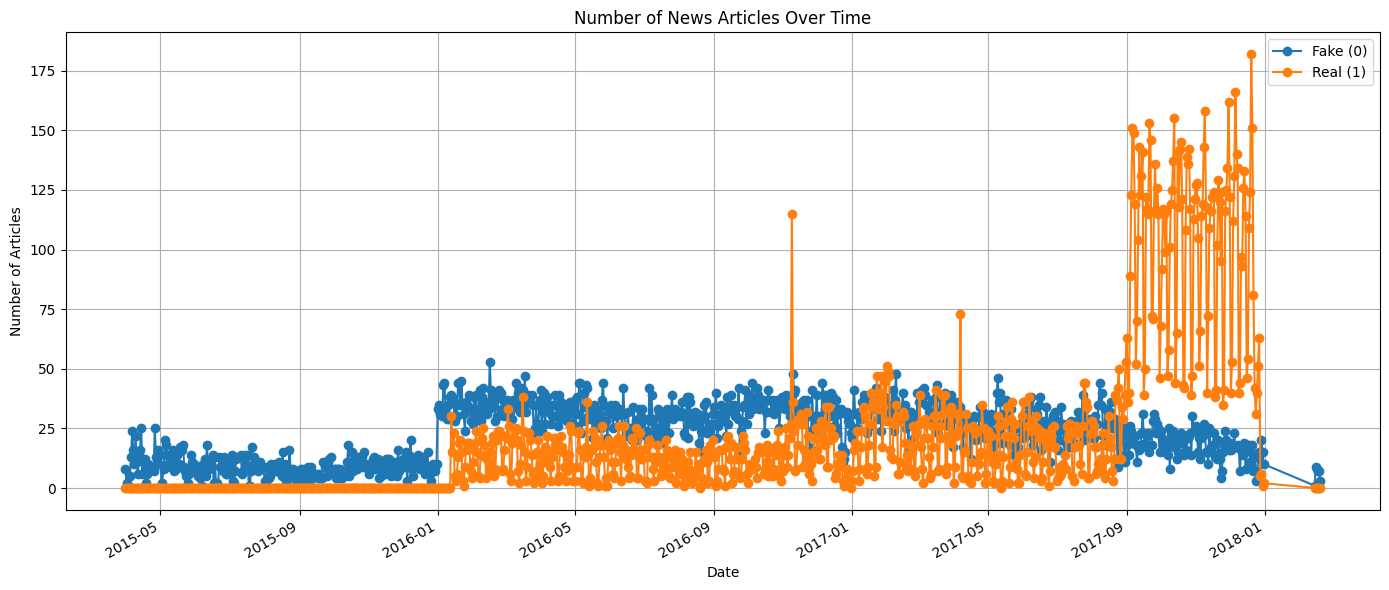

In [26]:
fake_true_dataset['date'] = pd.to_datetime(fake_true_dataset['date'], format='mixed', dayfirst=True, errors='coerce')
count_by_date = fake_true_dataset.groupby(['date', 'label']).size().unstack(fill_value=0)
plt.figure(figsize=(14,6))
count_by_date.plot(kind='line', figsize=(14,6), marker='o')
plt.title('Number of News Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend(['Fake (0)', 'Real (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()


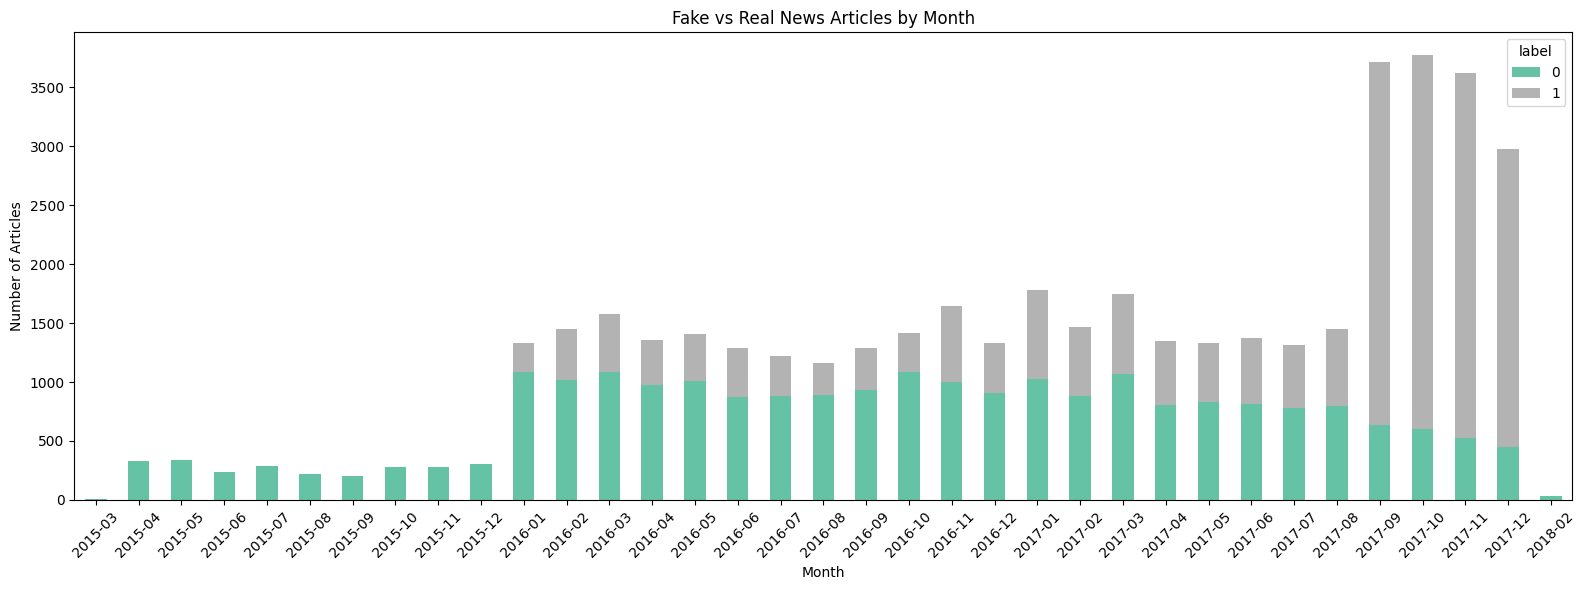

In [27]:
fake_true_dataset['month'] = fake_true_dataset['date'].dt.to_period('M')
monthly_counts = fake_true_dataset.groupby(['month', 'label']).size().unstack(fill_value=0)

monthly_counts.plot(kind='bar', stacked=True, figsize=(16,6), colormap='Set2')
plt.title('Fake vs Real News Articles by Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
fake_df = fake_true_dataset[fake_true_dataset['label'] == 0]

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text) 
    return text

all_titles = ' '.join(fake_df['text'].dropna().apply(clean_text))

words = all_titles.split()
word_counts = Counter(words)

print("🔝 Top 20 words in FAKE news titles:")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")


🔝 Top 20 words in FAKE news titles:
the: 527960
to: 289680
of: 235818
and: 224733
a: 210597
in: 164633
that: 150054
s: 130422
is: 110730
for: 92009
on: 81262
it: 78663
he: 77468
trump: 73933
was: 67720
with: 62922
his: 58032
as: 55909
this: 55235
be: 48543


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shlomias\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


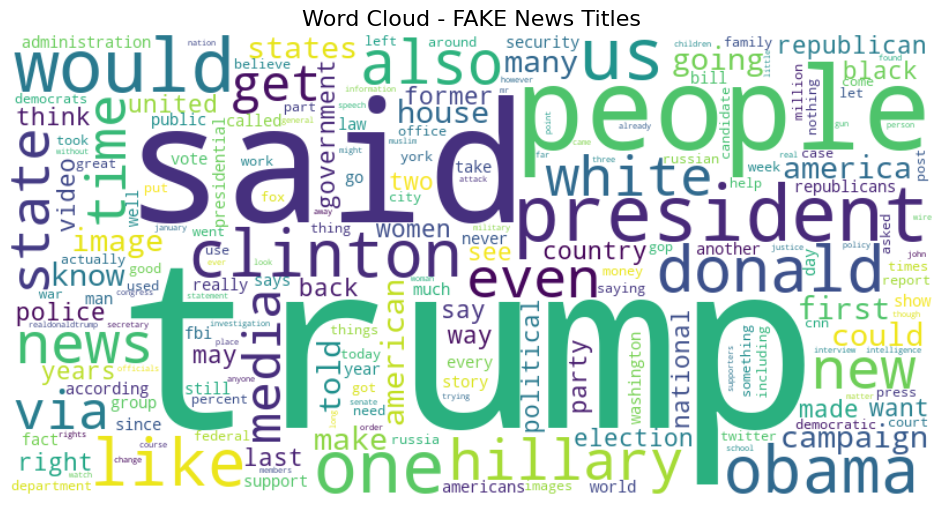

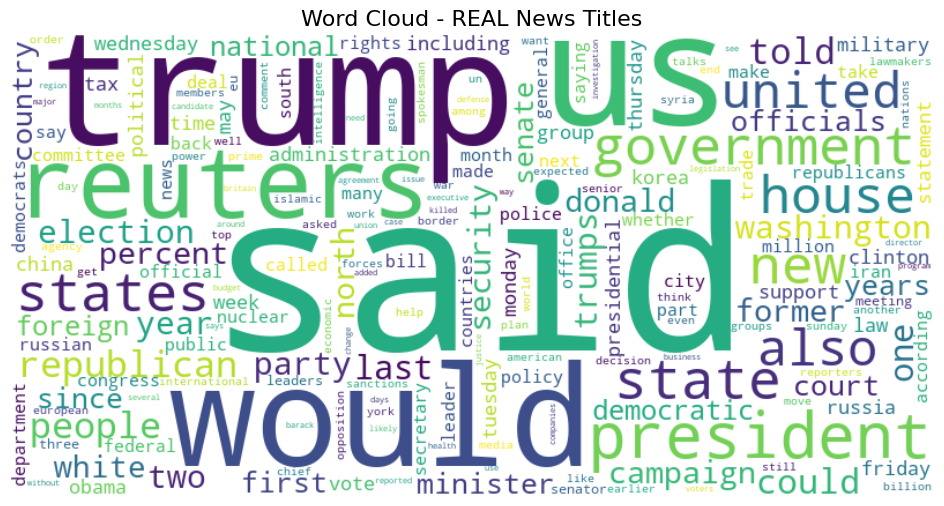

In [25]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

def generate_wordcloud(df, label_value, title):
    subset = df[df['label'] == label_value]
    all_titles = ' '.join(subset['text'].dropna().apply(clean_text))
    words = all_titles.split()
    filtered_words = [w for w in words if w not in stop_words]
    word_counts = Counter(filtered_words)
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

generate_wordcloud(fake_true_dataset, 0, "Word Cloud - FAKE News Titles")
generate_wordcloud(fake_true_dataset, 1, "Word Cloud - REAL News Titles")


Fake News Text:

Keywords:

trump, president, said, people, like, would, media, hillary, obama, campaign, white, state, donald

Characteristics:
- Emotional, dramatic, sensational content
- Names of politicians and public figures
- Less "newsy" and more emotional language
Words like really, like, even, could — hint at a vernacular or clickbait style

Real News Text:

Keywords:

reuters, us, said, president, government, senate, percent, north, korea, election, security, minister, state, republican

Characteristics:
- Official news style: reuters, percent, senate, officials, minister
- Accurate political and government content: bill, law, congress, election, military, foreign, security
- Use of names of institutions and countries (as opposed to just personal names)
- Fewer celebrity names, fewer emotional words

In [34]:
fake_true_dataset["subject"].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

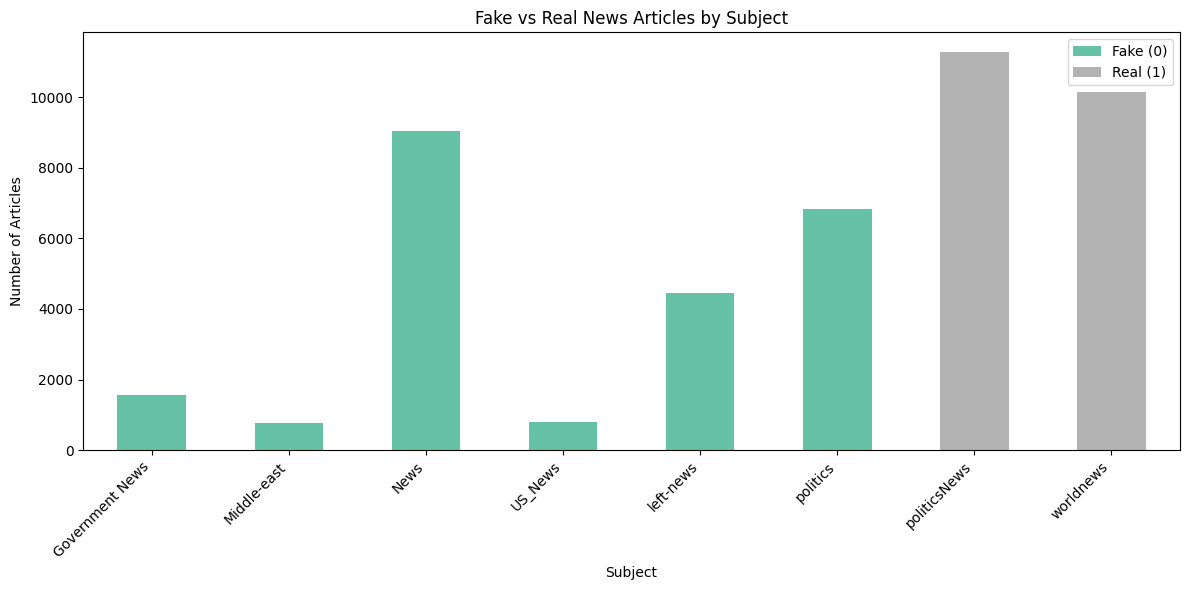

In [29]:
subject_counts = fake_true_dataset.groupby(['subject', 'label']).size().unstack(fill_value=0)

subject_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title('Fake vs Real News Articles by Subject')
plt.xlabel('Subject')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.legend(['Fake (0)', 'Real (1)'])
plt.tight_layout()
plt.show()

# fake_or_real_news Dataset

In [20]:
fake_or_real_news = data_io.load_csv(r'data/fake_or_real_news.csv')

In [21]:
fake_or_real_news.describe()

Unnamed: 0
count   6335.000000
mean    5280.415627
std     3038.503953
min        2.000000
25%     2674.500000
50%     5271.000000
75%     7901.000000
max    10557.000000

In [31]:
fake_or_real_news.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [32]:
fake_or_real_news["label"].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

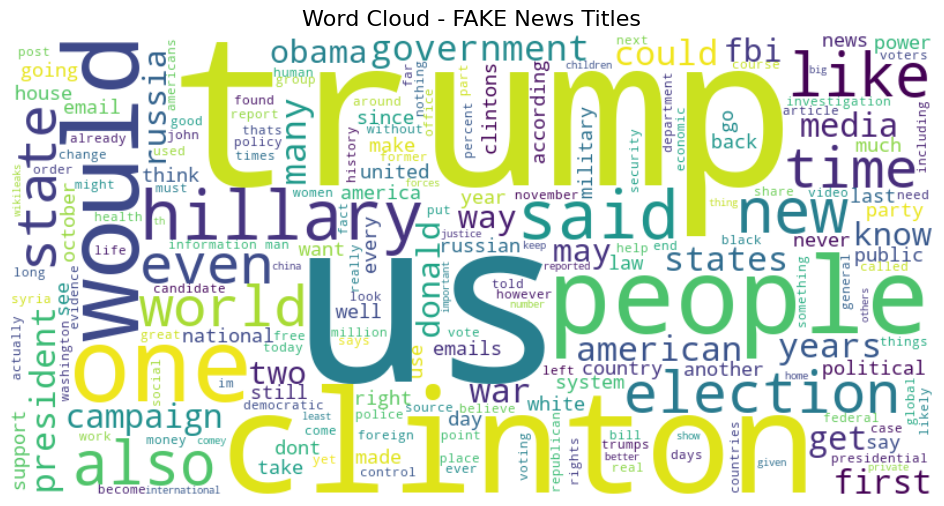

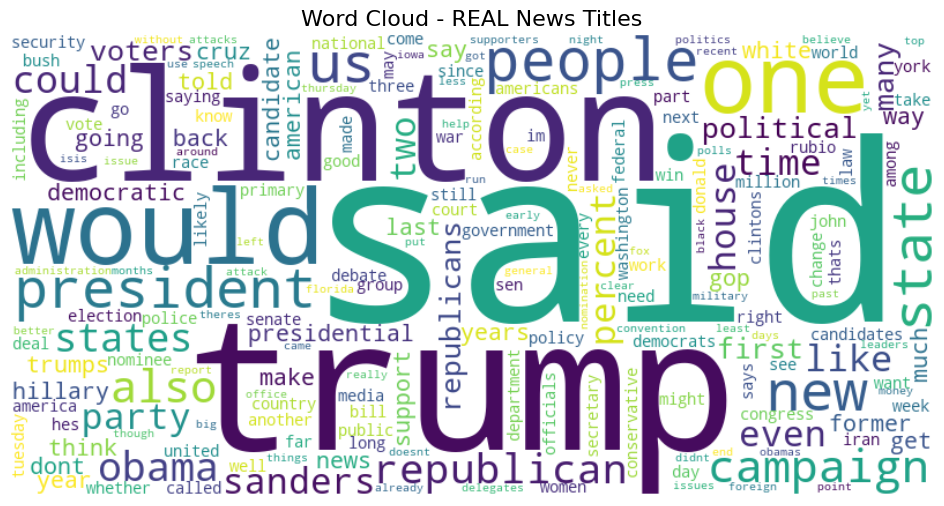

In [33]:
fake_or_real_news['label'] = fake_or_real_news['label'].map({'FAKE': 0, 'REAL': 1})

generate_wordcloud(fake_or_real_news, 0, "Word Cloud - FAKE News Titles")
generate_wordcloud(fake_or_real_news, 1, "Word Cloud - REAL News Titles")

FAKE content tends to be more provocative and personal
- Use of emotional general words: people, media, know, time
- A lot of emphasis on personal names (especially trump and clinton)
- Controversial topics like fbi, russia, war

REAL content is more balanced and composed of political frameworks
- Words like debate, party, vote, republican, democratic
- Political and formal analysis
- Presence of concepts like percent, foreign, campaign, policy

In [34]:
fake_or_real_news.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

# news_articles Dataset

In [18]:
news_articles = data_io.load_csv(r'data/news_articles.csv')

In [19]:
news_articles.describe()

hasImage
count  2095.000000
mean      0.777088
std       0.416299
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000

In [20]:
news_articles["label"].value_counts()

label
Fake    1294
Real     801
Name: count, dtype: int64

In [21]:
news_articles.isnull().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [22]:
news_articles.head()

author                      published  \
0     Barracuda Brigade  2016-10-26T21:41:00.000+03:00   
1  reasoning with facts  2016-10-29T08:47:11.259+03:00   
2     Barracuda Brigade  2016-10-31T01:41:49.479+02:00   
3                Fed Up  2016-11-01T05:22:00.000+02:00   
4                Fed Up  2016-11-01T21:56:00.000+02:00   

                                               title  \
0  muslims busted they stole millions in govt ben...   
1  re why did attorney general loretta lynch plea...   
2  breaking weiner cooperating with fbi on hillar...   
3  pin drop speech by father of daughter kidnappe...   
4  fantastic trumps  point plan to reform healthc...   

                                                text language  \
0  print they should pay all the back all the mon...  english   
1  why did attorney general loretta lynch plead t...  english   
2  red state  \nfox news sunday reported this mor...  english   
3  email kayla mueller was a prisoner and torture...  english   
4  email healthcare reform to make america great ...  english   

              site_url                                       main_img_url  \
0  100percentfedup.com  http://bb4sp.com/wp-content/uploads/2016/10/Fu...   
1  100percentfedup.com  http://bb4sp.com/wp-content/uploads/2016/10/Fu...   
2  100percentfedup.com  http://bb4sp.com/wp-content/uploads/2016/10/Fu...   
3  100percentfedup.com  http://100percentfedup.com/wp-content/uploads/...   
4  100percentfedup.com  http://100percentfedup.com/wp-content/uploads/...   

   type label                            title_without_stopwords  \
0  bias  Real        muslims busted stole millions govt benefits   
1  bias  Real         attorney general loretta lynch plead fifth   
2  bias  Real  breaking weiner cooperating fbi hillary email ...   
3  bias  Real  pin drop speech father daughter kidnapped kill...   
4  bias  Real  fantastic trumps point plan reform healthcare ...   

                              text_without_stopwords  hasImage  
0  print pay back money plus interest entire fami...       1.0  
1  attorney general loretta lynch plead fifth bar...       1.0  
2  red state fox news sunday reported morning ant...       1.0  
3  email kayla mueller prisoner tortured isis cha...       1.0  
4  email healthcare reform make america great sin...       1.0

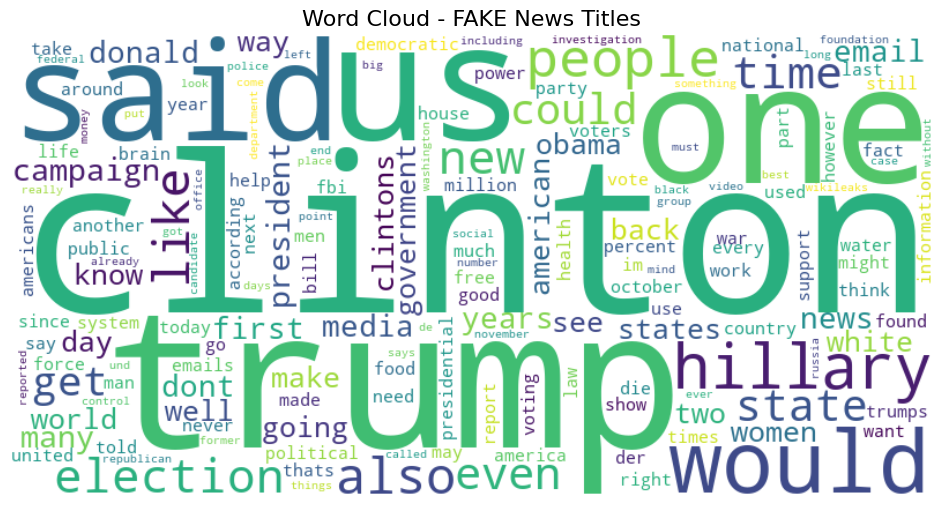

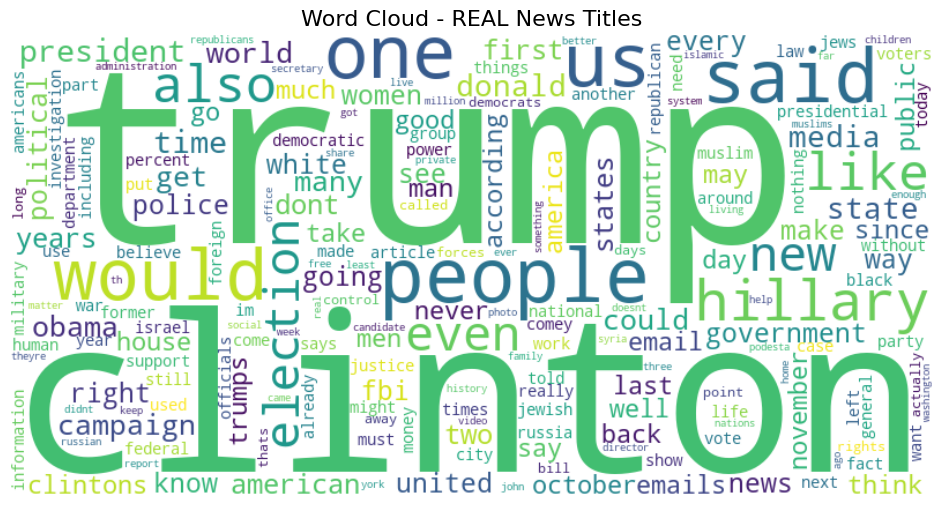

In [23]:
news_articles['label'] = news_articles['label'].map({'Fake': 0, 'Real': 1})

generate_wordcloud(news_articles, 0, "Word Cloud - FAKE News Titles")
generate_wordcloud(news_articles, 1, "Word Cloud - REAL News Titles")

In both cases, names like Trump, Clinton, US, people, said appear dominantly.

In Fake, more dramatic language is evident ("war", "brain", "email", "fbi", "must", "control", "water", "truth"), while in Real, more neutral words ("according", "percent", "report", "debate").

C:\Users\shlomias\AppData\Local\Temp\ipykernel_16004\2942952607.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  news_articles['month'] = news_articles['published'].dt.to_period('M')
C:\Users\shlomias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\shlomias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


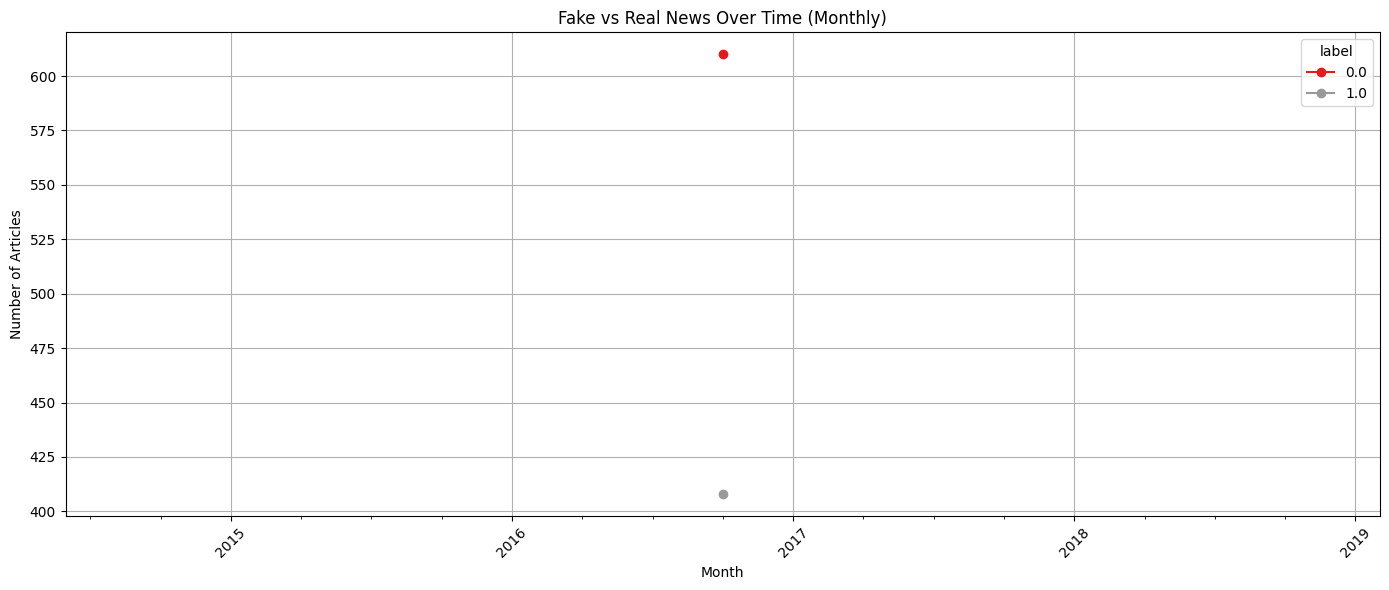

In [42]:
news_articles['published'] = pd.to_datetime(news_articles['published'], errors='coerce')
news_articles = news_articles[news_articles['published'].notna()]
news_articles['month'] = news_articles['published'].dt.to_period('M')
monthly = news_articles.groupby(['month', 'label']).size().unstack(fill_value=0)

monthly.plot(kind='line', figsize=(14,6), marker='o', colormap='Set1')
plt.title('Fake vs Real News Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

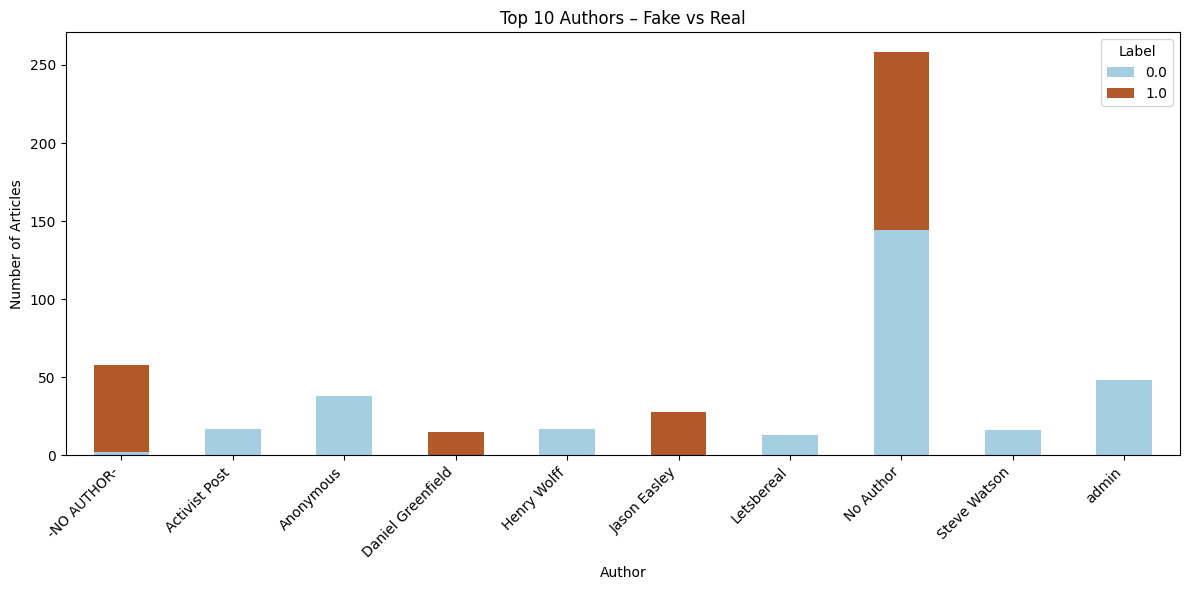

In [43]:
top_authors = news_articles['author'].value_counts().head(10).index
author_counts = news_articles[news_articles['author'].isin(top_authors)]
author_grouped = author_counts.groupby(['author', 'label']).size().unstack(fill_value=0)

author_grouped.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Paired')
plt.title('Top 10 Authors – Fake vs Real')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Label')
plt.tight_layout()
plt.show()


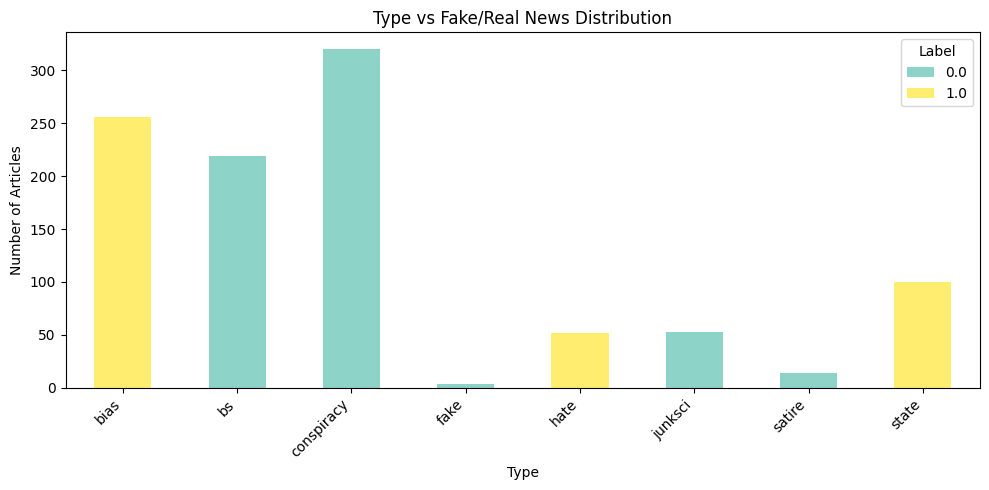

In [44]:
type_grouped = news_articles.groupby(['type', 'label']).size().unstack(fill_value=0)

type_grouped.plot(kind='bar', stacked=True, figsize=(10,5), colormap='Set3')
plt.title('Type vs Fake/Real News Distribution')
plt.xlabel('Type')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Label')
plt.tight_layout()
plt.show()


In [41]:
news_articles["type"].value_counts()

type
bs            601
bias          436
conspiracy    430
hate          244
satire        146
state         121
junksci       102
fake           15
Name: count, dtype: int64

In [42]:
news_articles["hasImage"].value_counts()

hasImage
1.0    1628
0.0     467
Name: count, dtype: int64

In [25]:
# liar_data Dataset
test = data_io.load_liar_table(r'data/liar_data/test.tsv')
train = data_io.load_liar_table(r'data/liar_data/train.tsv')
valid = data_io.load_liar_table(r'data/liar_data/valid.tsv')
liar_data = pd.concat([test, train, valid])

In [26]:
liar_data.describe()

barely_true_c       false_c   half_true_c  mostly_true_c  \
count   12789.000000  12789.000000  12789.000000   12789.000000   
mean       11.583939     13.359059     17.185785      16.497850   
std        18.978037     24.140086     35.847678      36.165276   
min         0.000000      0.000000      0.000000       0.000000   
25%         0.000000      0.000000      0.000000       0.000000   
50%         2.000000      2.000000      3.000000       3.000000   
75%        12.000000     15.000000     13.000000      12.000000   
max        70.000000    114.000000    160.000000     163.000000   

       pants_on_fire_c  
count     12789.000000  
mean          6.251388  
std          16.180777  
min           0.000000  
25%           0.000000  
50%           1.000000  
75%           5.000000  
max         105.000000

In [27]:
liar_data.head()

id       label                                          statement  \
0  11972.json        true  Building a wall on the U.S.-Mexico border will...   
1  11685.json       false  Wisconsin is on pace to double the number of l...   
2  11096.json       false  Says John McCain has done nothing to help the ...   
3   5209.json   half-true  Suzanne Bonamici supports a plan that will cut...   
4   9524.json  pants-fire  When asked by a reporter whether hes at the ce...   

                                             subject  \
0                                        immigration   
1                                               jobs   
2                    military,veterans,voting-record   
3  medicare,message-machine-2012,campaign-adverti...   
4  campaign-finance,legal-issues,campaign-adverti...   

                            speaker                   job      state  \
0                        rick-perry              Governor      Texas   
1                 katrina-shankland  State representative  Wisconsin   
2                      donald-trump       President-Elect   New York   
3                     rob-cornilles            consultant     Oregon   
4  state-democratic-party-wisconsin                   NaN  Wisconsin   

        party  barely_true_c  false_c  half_true_c  mostly_true_c  \
0  republican           30.0     30.0         42.0           23.0   
1    democrat            2.0      1.0          0.0            0.0   
2  republican           63.0    114.0         51.0           37.0   
3  republican            1.0      1.0          3.0            1.0   
4    democrat            5.0      7.0          2.0            2.0   

   pants_on_fire_c                         venue  
0             18.0               Radio interview  
1              0.0             a news conference  
2             61.0  comments on ABC's This Week.  
3              1.0                  a radio show  
4              7.0                   a web video

In [28]:
liar_data["label"].value_counts()

label
half-true      2627
false          2507
mostly-true    2454
barely-true    2103
true           2053
pants-fire     1047
Name: count, dtype: int64

In [36]:
liar_data["label"] = liar_data["label"].apply(lambda x: 0 if x in ["false", "pants-fire", "barely-true"] else 1)

In [37]:
liar_data["label"].value_counts()

label
1    7134
0    5657
Name: count, dtype: int64

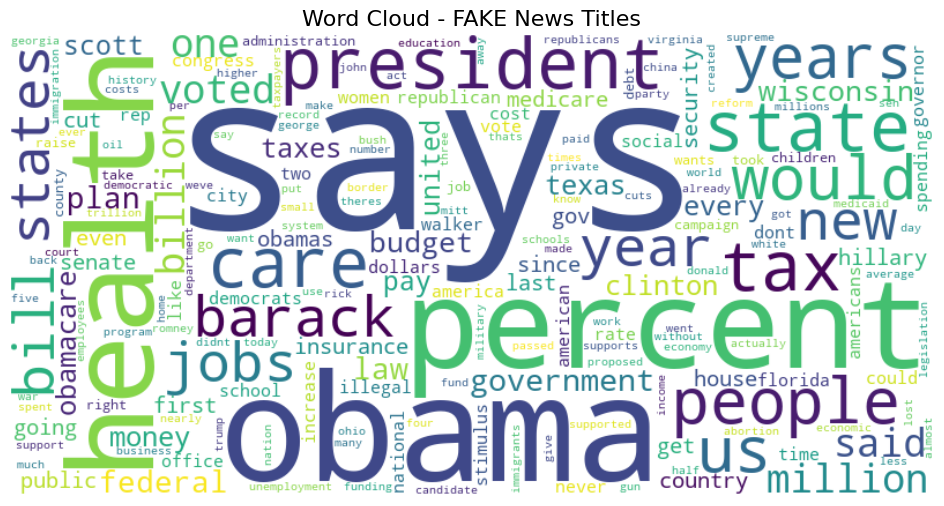

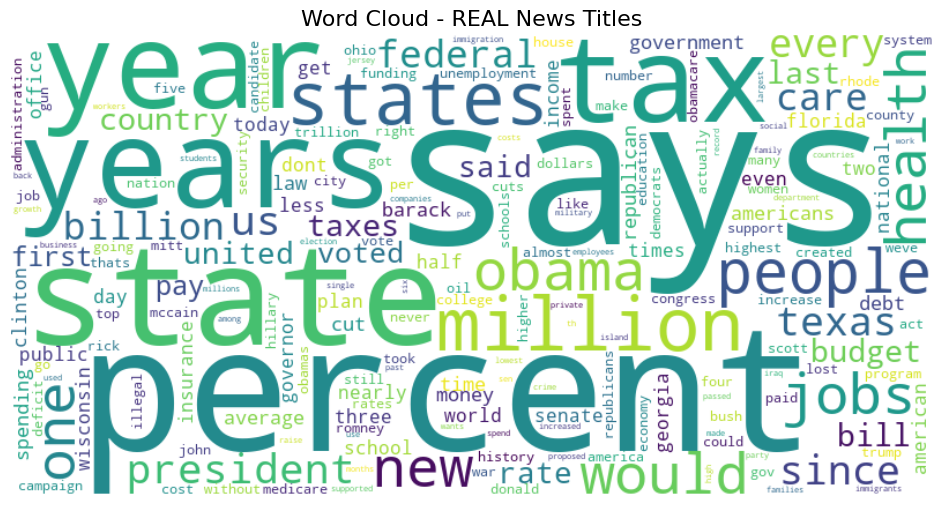

In [38]:
liar_data.rename(columns={'statement': 'text'}, inplace=True)
generate_wordcloud(liar_data, 0, "Word Cloud - FAKE News Titles")
generate_wordcloud(liar_data, 1, "Word Cloud - REAL News Titles")

- Dominant words common to both types - Both groups include similar dominant words such as:

"says", "percent", "state", "year", "people", "tax", "president", "million", "obama"
These are neutral or factual words that indicate quotes, numerical data, political positions, personalities and economic issues.

This indicates that both types of articles (FAKE and REAL) use language that sounds "official" or "journalistic", which sometimes makes it difficult to immediately identify fake news.

- Unique or more prominent words in FAKE

While the core words are similar, a more intense use of some relatively emotional or provocative words can be observed in FAKE, such as:

"obama", "hillary", "health", "care", "scott", "water", "federal", "jobs", "voted"

The words imply controversial, direct criticism, and sometimes manipulative political content - for example, "hillary", "water", or "tax" - topics that generate emotion and public reactions.

FAKE articles tend to emphasize controversial topics, use the names of politicians and government institutions to create drama or arouse public anger.

- Unique or more prominent words in REAL - In real articles, words such as:

"school", "rate", "education", "country", "insurance", "florida", "funding"

These are more practical and systemic terms. They appear to be taken from regular journalistic reporting or socio-political monitoring.

REAL articles focus more on socioeconomic facts and terms that are typical of professional discussions or public policy.

C:\Users\shlomias\AppData\Local\Temp\ipykernel_25020\2770137494.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


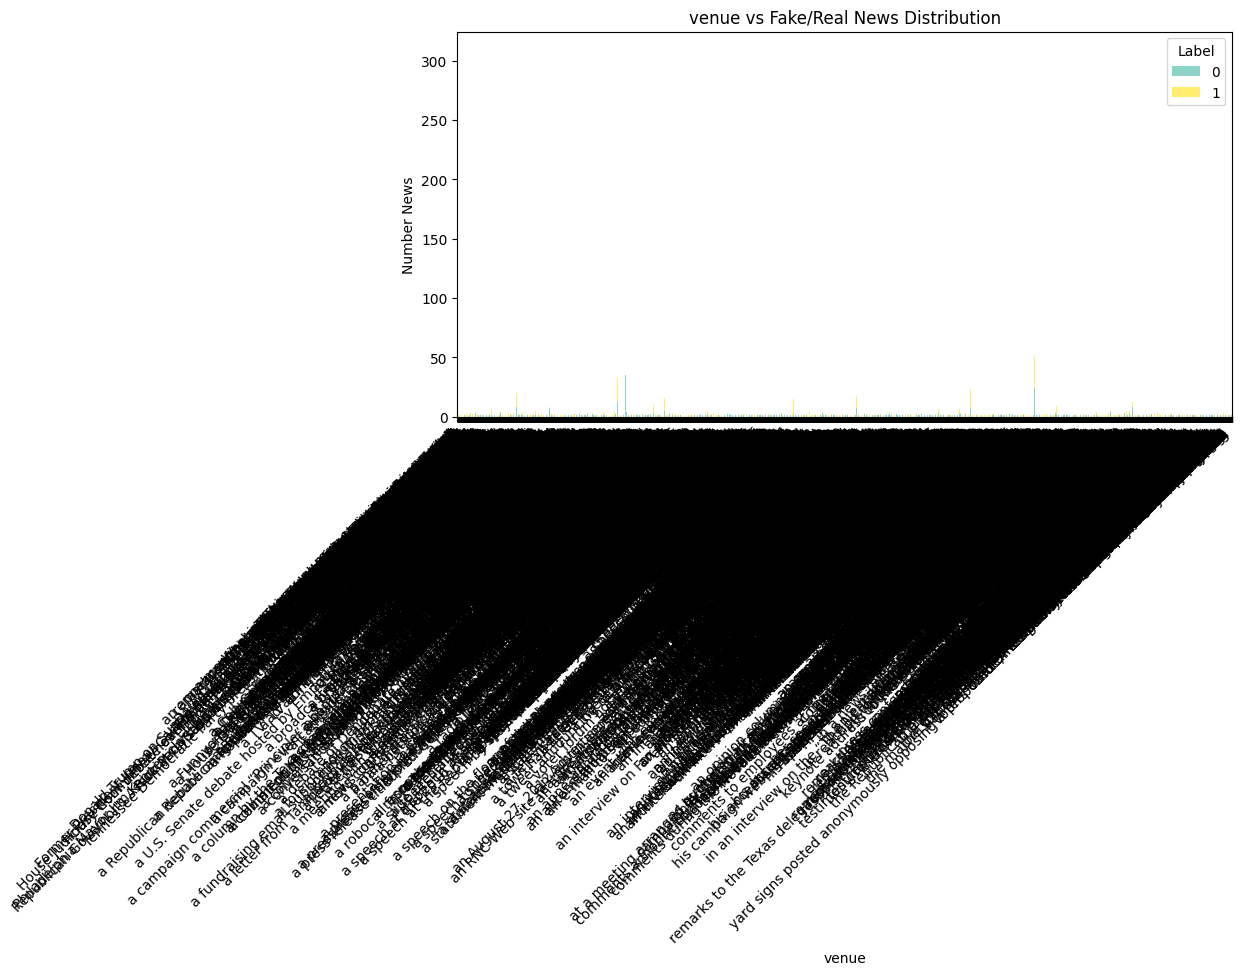

In [42]:
type_grouped = liar_data.groupby(['venue', 'label']).size().unstack(fill_value=0)

type_grouped.plot(kind='bar', stacked=True, figsize=(10,5), colormap='Set3')
plt.title('venue vs Fake/Real News Distribution')
plt.xlabel('venue')
plt.ylabel('Number News')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Label')
plt.tight_layout()
plt.show()


In [43]:
liar_data["venue"].value_counts()

venue
a news release                   309
an interview                     286
a press release                  282
a speech                         259
a TV ad                          222
                                ... 
a Tweet to PolitiFact Georgia      1
a Fox News debate                  1
in a speech in Orlando, Fla.       1
the book 'No Apology'              1
a speech on the economy            1
Name: count, Length: 5142, dtype: int64

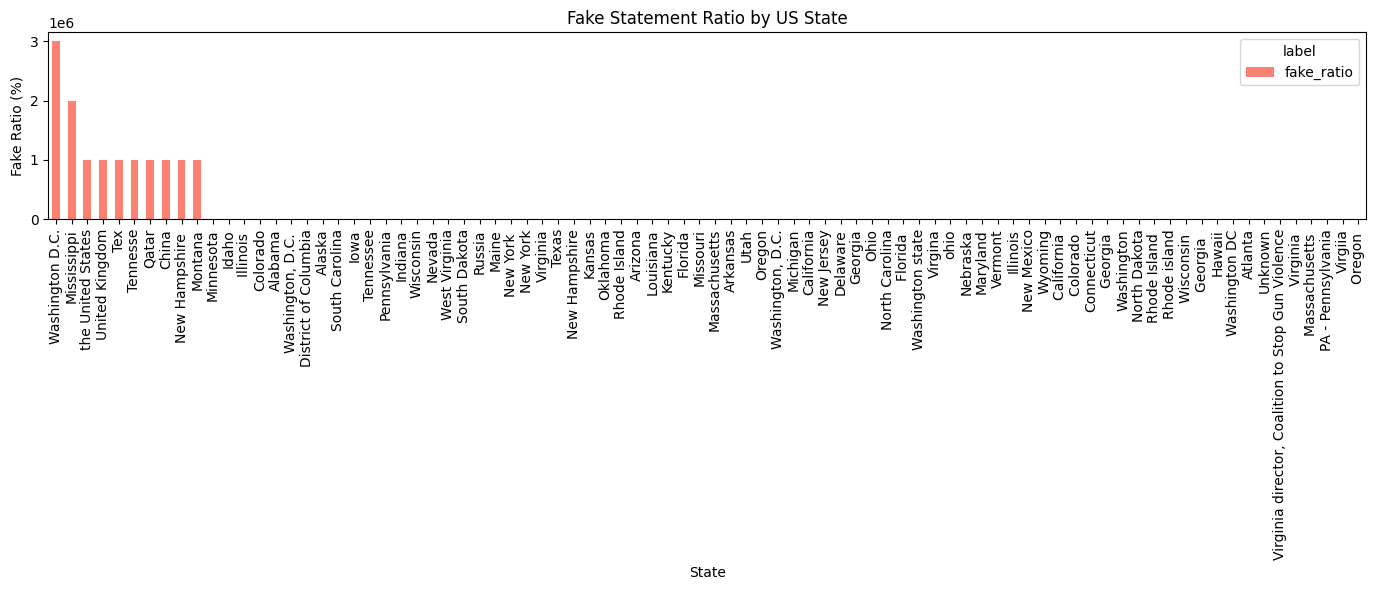

In [44]:
state_grouped = liar_data.groupby(['state', 'label']).size().unstack(fill_value=0)
state_grouped['fake_ratio'] = state_grouped[0] / (state_grouped[1] + 1e-6) 
state_grouped_sorted = state_grouped.sort_values('fake_ratio', ascending=False)

state_grouped.sort_values('fake_ratio', ascending=False)[['fake_ratio']].plot(kind='bar', figsize=(14,6), color='salmon')
plt.title('Fake Statement Ratio by US State')
plt.ylabel('Fake Ratio (%)')
plt.xlabel('State')
plt.tight_layout()
plt.show()


# Fake News Stories Dataset

In [45]:
Fake_News_Stories = data_io.load_xlsx('data/Fake News Stories.xlsx')
Fake_News_Stories["label"] = 0

In [46]:
Fake_News_Stories.head()

Article Number                                     URL of article  \
0           375.0  http://www.redflagnews.com/headlines-2016/cdc-...   
1           376.0  http://www.redflagnews.com/headlines-2016/-out...   
2           377.0  http://www.redflagnews.com/headlines-2016/whit...   
3           378.0  http://www.redflagnews.com/headlines-2016/obam...   
4           379.0  http://www.redflagnews.com/headlines-2016/cali...   

  Fake or Satire?                           URL of rebutting article  label  
0            Fake     http://www.snopes.com/cdc-forced-vaccinations/      0  
1            Fake     http://www.snopes.com/white-house-logo-change/      0  
2            Fake  http://www.snopes.com/obama-veterans-money-to-...      0  
3            Fake  http://www.snopes.com/obama-veterans-money-to-...      0  
4            Fake  http://www.snopes.com/california-to-jail-clima...      0

In [47]:
Fake_News_Stories.describe()

Article Number  label
count      492.000000  887.0
mean       289.792683    0.0
std        169.817410    0.0
min          2.000000    0.0
25%        138.750000    0.0
50%        296.500000    0.0
75%        432.250000    0.0
max        595.000000    0.0

In [32]:
Fake_News_Stories.columns

Index(['Article Number', 'URL of article', 'Fake or Satire?',
       'URL of rebutting article'],
      dtype='object')

In [33]:
Fake_News_Stories["Fake or Satire?"].value_counts()

Fake or Satire?
Fake       291
Satire     176
Satire      25
Name: count, dtype: int64

In [48]:
tar_path = "data/PHEMEpreprocessed4multitask.tar.gz"
extract_path = "data/PHEME_extracted"
# data_io.extract_tar_gz(tar_path, extract_path)

In [49]:
data_io.show_files_in_directory(extract_path)

Files in directory data/PHEME_extracted:
data/PHEME_extracted\saved_data\.DS_Store
data/PHEME_extracted\saved_data\saved_data_MTL2_detection\charliehebdo\fold_stance_labels.npy
data/PHEME_extracted\saved_data\saved_data_MTL2_detection\charliehebdo\ids.npy
data/PHEME_extracted\saved_data\saved_data_MTL2_detection\charliehebdo\labels.npy
data/PHEME_extracted\saved_data\saved_data_MTL2_detection\charliehebdo\mask.npy
data/PHEME_extracted\saved_data\saved_data_MTL2_detection\charliehebdo\rnr_labels.npy
data/PHEME_extracted\saved_data\saved_data_MTL2_detection\charliehebdo\train_array.npy
data/PHEME_extracted\saved_data\saved_data_MTL2_detection\charliehebdo\tweet_ids.npy
data/PHEME_extracted\saved_data\saved_data_MTL2_detection\clinton-health\fold_stance_labels.npy
data/PHEME_extracted\saved_data\saved_data_MTL2_detection\clinton-health\ids.npy
data/PHEME_extracted\saved_data\saved_data_MTL2_detection\clinton-health\labels.npy
data/PHEME_extracted\saved_data\saved_data_MTL2_detection\clint

In [50]:
base_path = 'data/PHEME_extracted/saved_data/saved_data_MTL2_detection'

event_folders = [
    'charliehebdo', 'clinton-health', 'ebola-essien', 'ferguson',
    'germanwings-crash', 'gurlitt', 'marinajoyce', 'ottawashooting',
    'prince-toronto', 'putinmissing', 'sydneysiege'
]

label_stats = {}

for event in event_folders:
    label_path = os.path.join(base_path, event, 'labels.npy')
    if os.path.exists(label_path):
        labels = np.load(label_path, allow_pickle=True)
        unique, counts = np.unique(labels, return_counts=True)
        label_stats[event] = dict(zip(unique, counts))

label_df = pd.DataFrame(label_stats).fillna(0).astype(int).T
label_df['total'] = label_df.sum(axis=1)

print(label_df)

print("\nTotal for all labels:")
print(label_df.sum())


                       0     1  total
charliehebdo       65513  4774  70287
clinton-health       646   323    969
ebola-essien         324   162    486
ferguson           39561  3792  43353
germanwings-crash   7523  1633   9156
gurlitt              386    76    462
marinajoyce          274   137    411
ottawashooting     20624  4369  24993
prince-toronto      1091   538   1629
putinmissing        1286   316   1602
sydneysiege        38382  5628  44010

Total for all labels:
0        175610
1         21748
total    197358
dtype: int64


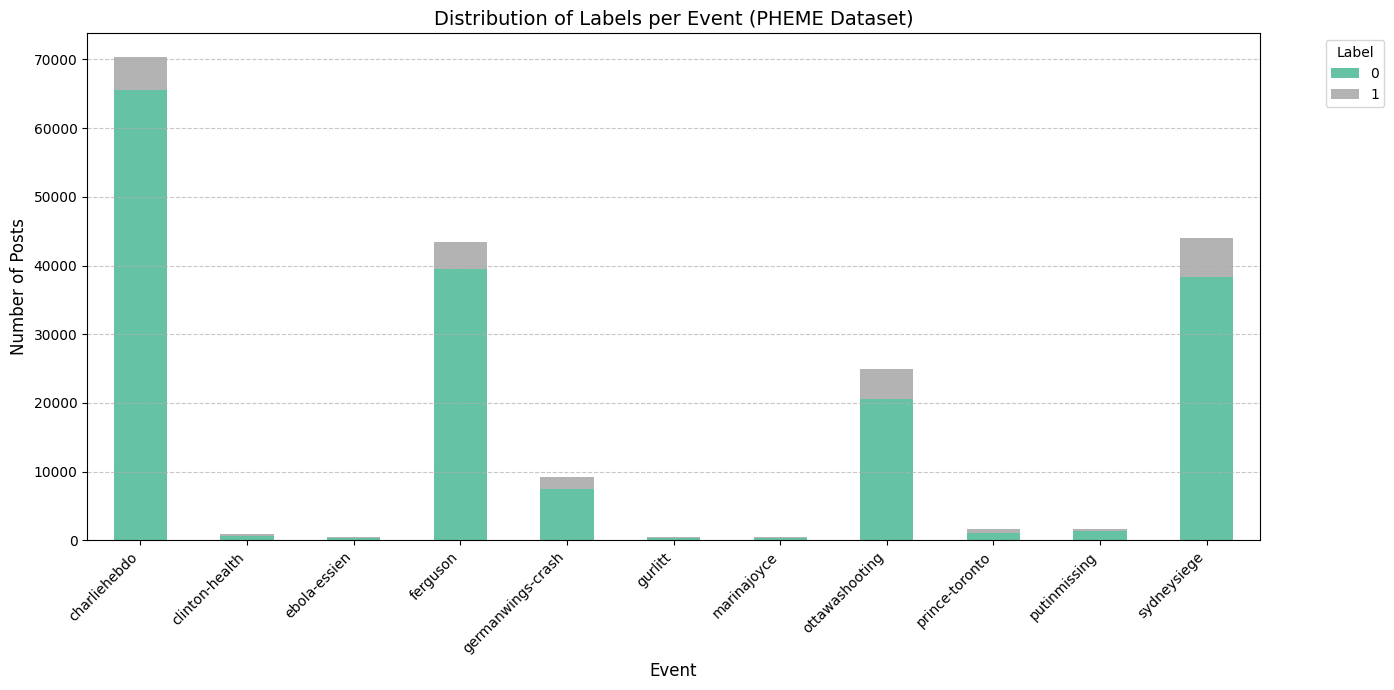

In [51]:
label_df_no_total = label_df.drop(columns='total')

label_df_no_total.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='Set2'
)

plt.title('Distribution of Labels per Event (PHEME Dataset)', fontsize=14)
plt.xlabel('Event', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# all_result Dataset

In [2]:
all_result = data_io.load_csv(r'data/all_results.csv')

In [3]:
all_result.describe()

qid    annotation  normalized_annotation     age_group  \
count  38685.000000  56475.000000           56475.000000  54503.000000   
mean      23.933644      1.554405              -0.207844      2.414418   
std       14.359327      2.602265               0.671414      1.035094   
min        0.000000     -1.000000              -1.000000      1.000000   
25%       11.000000     -1.000000              -1.000000      2.000000   
50%       24.000000      0.000000               0.000000      2.000000   
75%       36.000000      5.000000               0.000000      3.000000   
max       48.000000      8.000000               1.000000      4.000000   

              order     vid_order  
count  17790.000000  14825.000000  
mean       9.134907      3.000000  
std        5.696940      1.414261  
min        0.000000      1.000000  
25%        4.000000      2.000000  
50%        9.000000      3.000000  
75%       14.000000      4.000000  
max       19.000000      5.000000

In [ ]:
all_result.head()

qid                                      vid_url  \
0  0.0  https://www.youtube.com/watch?v=9gCN7pIX3Es   
1  0.0  https://www.youtube.com/watch?v=r7ZFMiXP1PM   
2  0.0  https://www.youtube.com/watch?v=SMDkvJRHaNM   
3  0.0  https://www.youtube.com/watch?v=T9eBroSQ6ug   
4  0.0  https://www.youtube.com/watch?v=VPKVBOHS6Rs   

                                           vid_title  \
0                Rare video from ground zero on 9/11   
1          9/11 Anniversary: Behind the 19 Hijackers   
2  The Falling Man | Behind The Photo | 100 Photo...   
3                               9/11: 15 years later   
4  Cameraman Recalls How Events of 9/11 Unfolded ...   

                                          aria-label  annotation stance  \
0  Rare video from ground zero on 9/11 by 60 Minu...           0    NaN   
1  9/11 Anniversary: Behind the 19 Hijackers by A...           0    NaN   
2  The Falling Man | Behind The Photo | 100 Photo...           0    NaN   
3  9/11: 15 years later by CBS Sunday Morning 2 y...           0    NaN   
4  Cameraman Recalls How Events of 9/11 Unfolded ...           0    NaN   

   normalized_annotation  age_group  gender activity activity_type topic  \
0                      0        3.0  Female   Search  Demographics   all   
1                      0        4.0  Female   Search  Demographics   all   
2                      0        4.0  Female   Search  Demographics   all   
3                      0        4.0  Female   Search  Demographics   all   
4                      0        4.0  Female   Search  Demographics   all   

                   geolocation geo_temperature component_name  order  \
0  us-east1-b (South Carolina)             NaN  SearchResults    NaN   
1  us-east1-b (South Carolina)             NaN  SearchResults    NaN   
2  us-east1-b (South Carolina)             NaN  SearchResults    NaN   
3  us-east1-b (South Carolina)             NaN  SearchResults    NaN   
4  us-east1-b (South Carolina)             NaN  SearchResults    NaN   

   vid_order  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

In [6]:
all_result["stance"].value_counts()

stance
neutral      15672
promoting    15492
debunking    15491
Name: count, dtype: int64

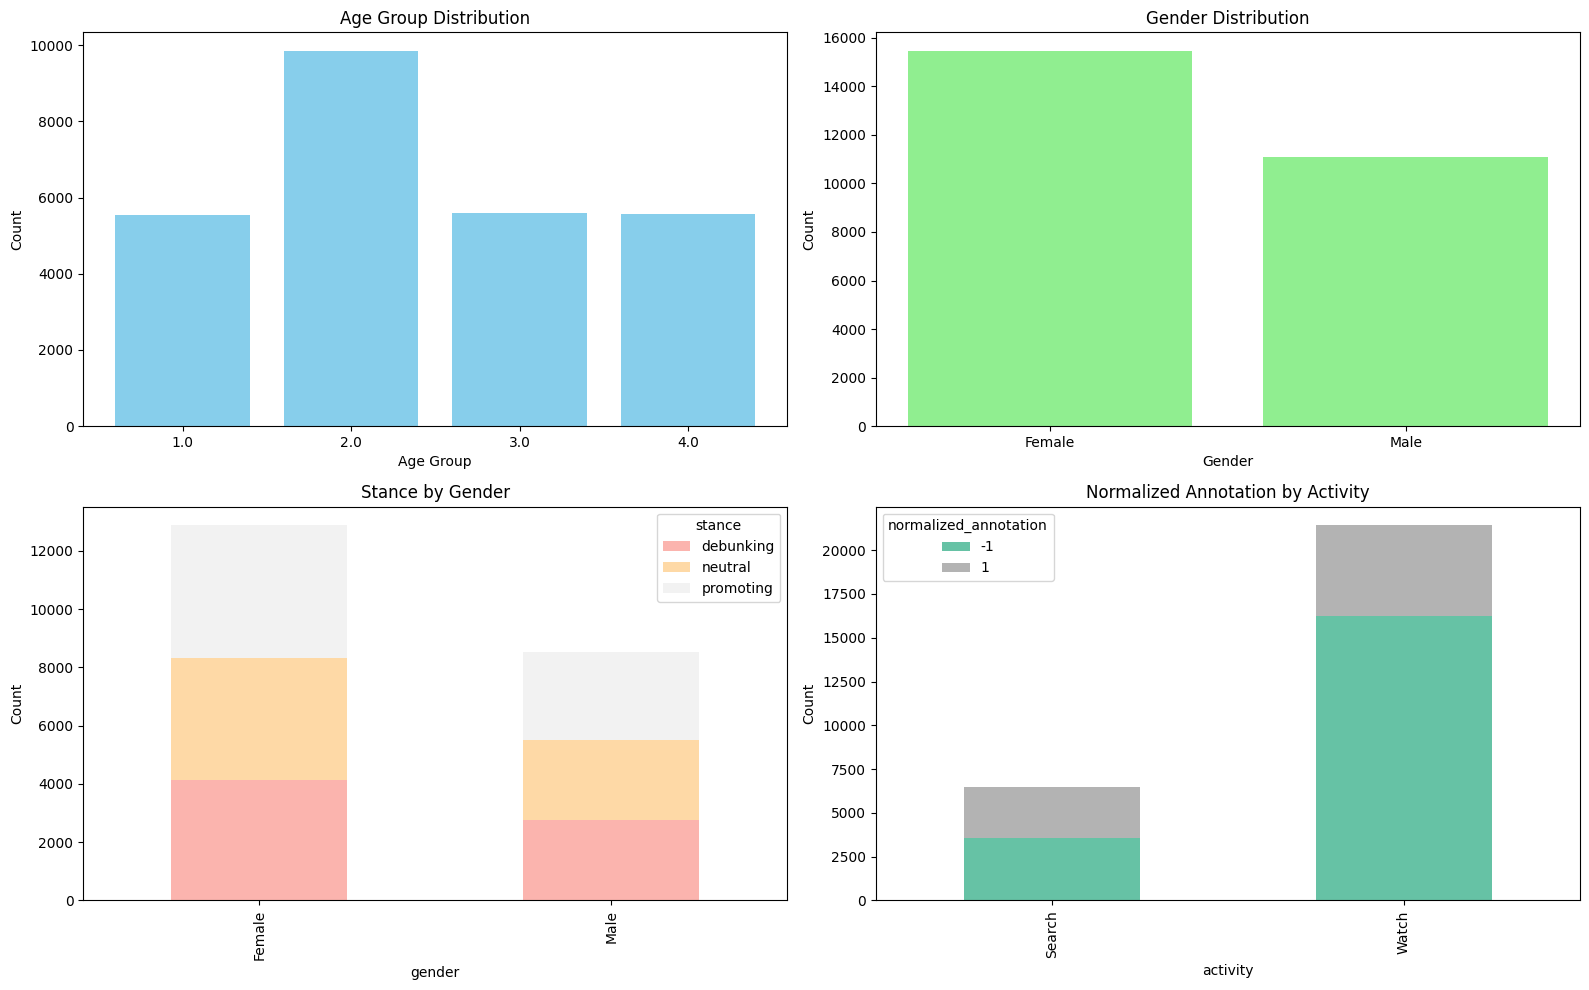

In [13]:
df = all_result.copy()
df.columns = df.columns.str.strip()

df['age_group'] = df['age_group'].astype('category')
df['gender'] = df['gender'].astype('category')
df['activity'] = df['activity'].astype('category')
df['activity_type'] = df['activity_type'].astype('category')
df['normalized_annotation'] = df['normalized_annotation'].fillna(-1).astype(int)

age_dist = df['age_group'].value_counts().sort_index()
gender_dist = df['gender'].value_counts()
stance_gender = pd.crosstab(df['gender'], df['stance'])
annot_activity = pd.crosstab(df['activity'], df['normalized_annotation'])

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

axs[0, 0].bar(age_dist.index.astype(str), age_dist.values, color='skyblue')
axs[0, 0].set_title("Age Group Distribution")
axs[0, 0].set_xlabel("Age Group")
axs[0, 0].set_ylabel("Count")

axs[0, 1].bar(gender_dist.index, gender_dist.values, color='lightgreen')
axs[0, 1].set_title("Gender Distribution")
axs[0, 1].set_xlabel("Gender")
axs[0, 1].set_ylabel("Count")

stance_gender.plot(kind='bar', stacked=True, ax=axs[1, 0], colormap='Pastel1')
axs[1, 0].set_title("Stance by Gender")
axs[1, 0].set_ylabel("Count")

annot_activity.plot(kind='bar', stacked=True, ax=axs[1, 1], colormap='Set2')
axs[1, 1].set_title("Normalized Annotation by Activity")
axs[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [8]:
all_result.columns

Index(['qid', 'vid_url', 'vid_title', 'aria-label', 'annotation', 'stance',
       'normalized_annotation', 'age_group', 'gender', 'activity',
       'activity_type', 'topic', 'geolocation', 'geo_temperature',
       'component_name', 'order', 'vid_order'],
      dtype='object')

In [9]:
all_result["normalized_annotation"].value_counts()

normalized_annotation
 0    28577
-1    19818
 1     8080
Name: count, dtype: int64

In [10]:
all_result["annotation"].value_counts()

annotation
-1    18835
 5    17721
 0     9942
 1     6952
 4     1128
 2      983
 3      525
 8      287
 7      102
Name: count, dtype: int64

In [11]:
all_result = all_result[all_result['normalized_annotation'] != 0] 
all_result['label'] = all_result['normalized_annotation'].map({-1: 1, 1: 0})
all_result["label"].value_counts()

label
1    19818
0     8080
Name: count, dtype: int64

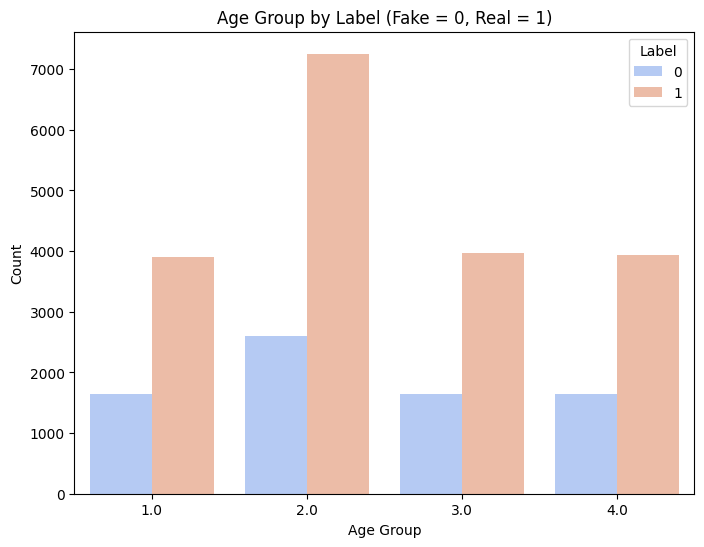

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=all_result, x='age_group', hue='label', palette='coolwarm')
plt.title("Age Group by Label (Fake = 0, Real = 1)")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Label")
plt.show()

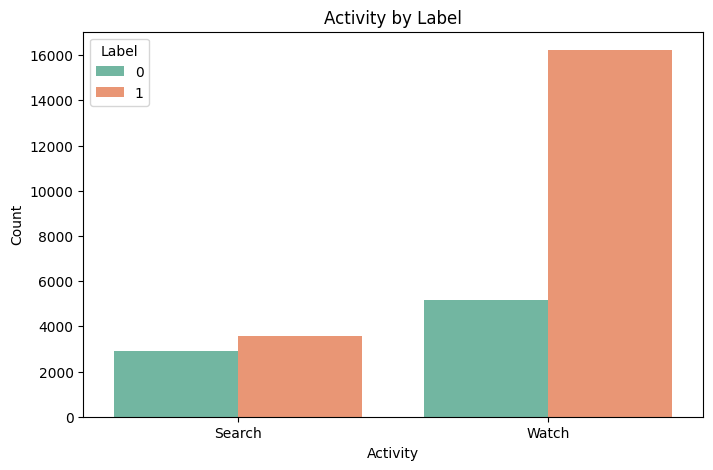

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(data=all_result, x='activity', hue='label', palette='Set2')
plt.title("Activity by Label")
plt.xlabel("Activity")
plt.ylabel("Count")
plt.legend(title="Label")
plt.show()

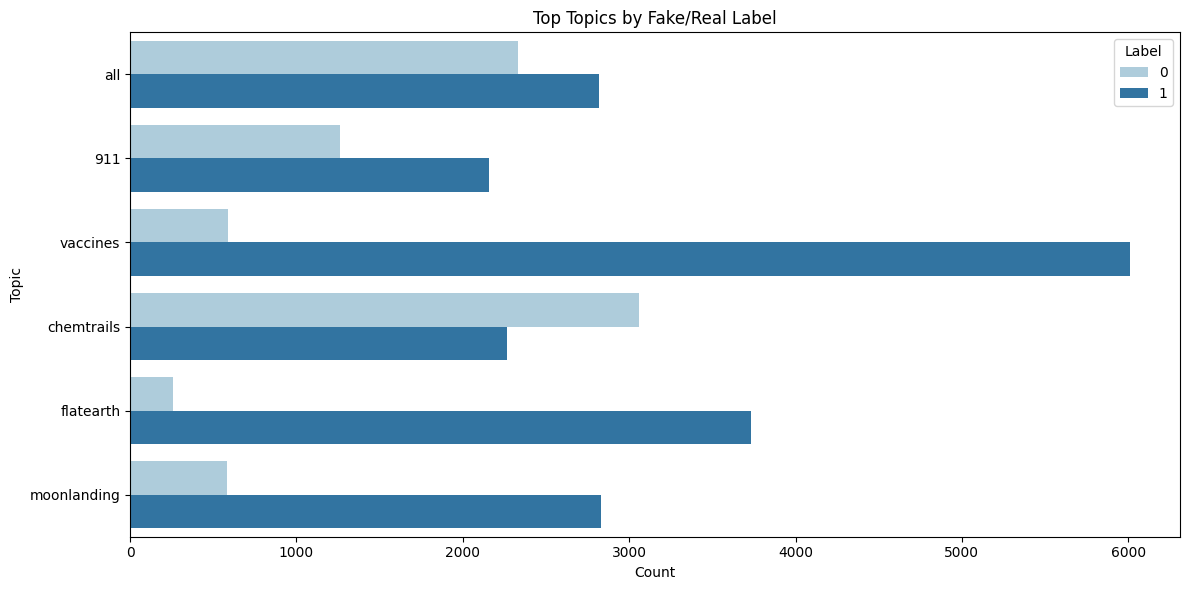

In [18]:
top_topics = all_result['topic'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(data=all_result[all_result['topic'].isin(top_topics)],
              y='topic', hue='label', palette='Paired')
plt.title("Top Topics by Fake/Real Label")
plt.xlabel("Count")
plt.ylabel("Topic")
plt.legend(title="Label")
plt.tight_layout()
plt.show()

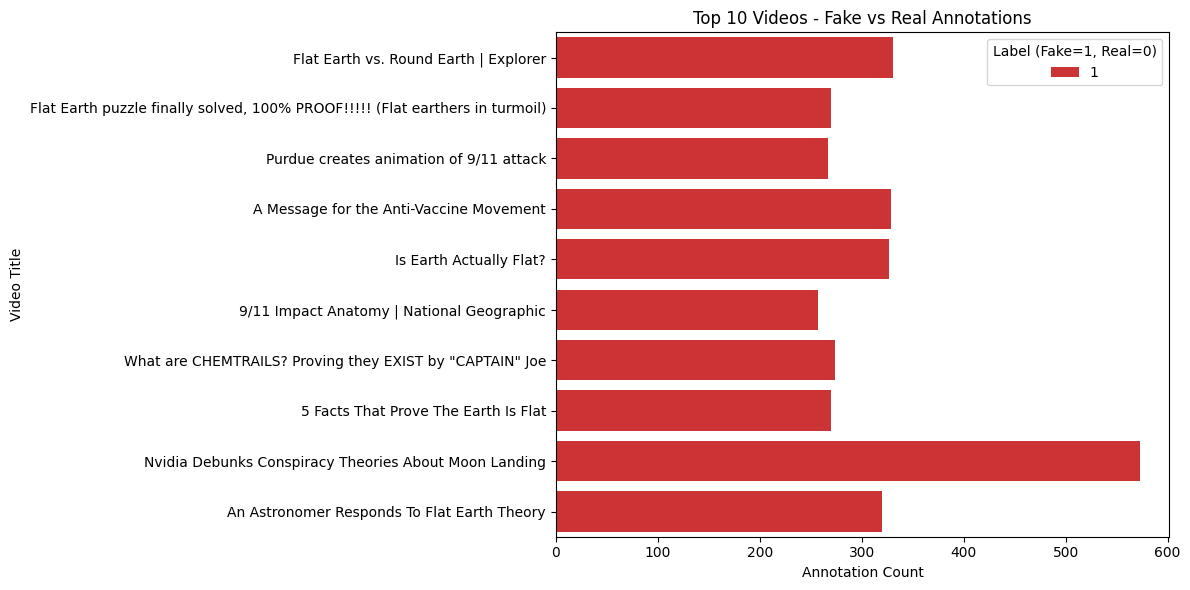

In [19]:
video_counts = all_result.groupby(['vid_url', 'vid_title', 'label']).size().reset_index(name='count')

top_videos = video_counts.groupby('vid_url')['count'].sum().nlargest(10).index
top_video_data = video_counts[video_counts['vid_url'].isin(top_videos)]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_video_data, x='count', y='vid_title', hue='label', palette='Set1')
plt.title("Top 10 Videos - Fake vs Real Annotations")
plt.xlabel("Annotation Count")
plt.ylabel("Video Title")
plt.legend(title="Label (Fake=1, Real=0)")
plt.tight_layout()
plt.show()

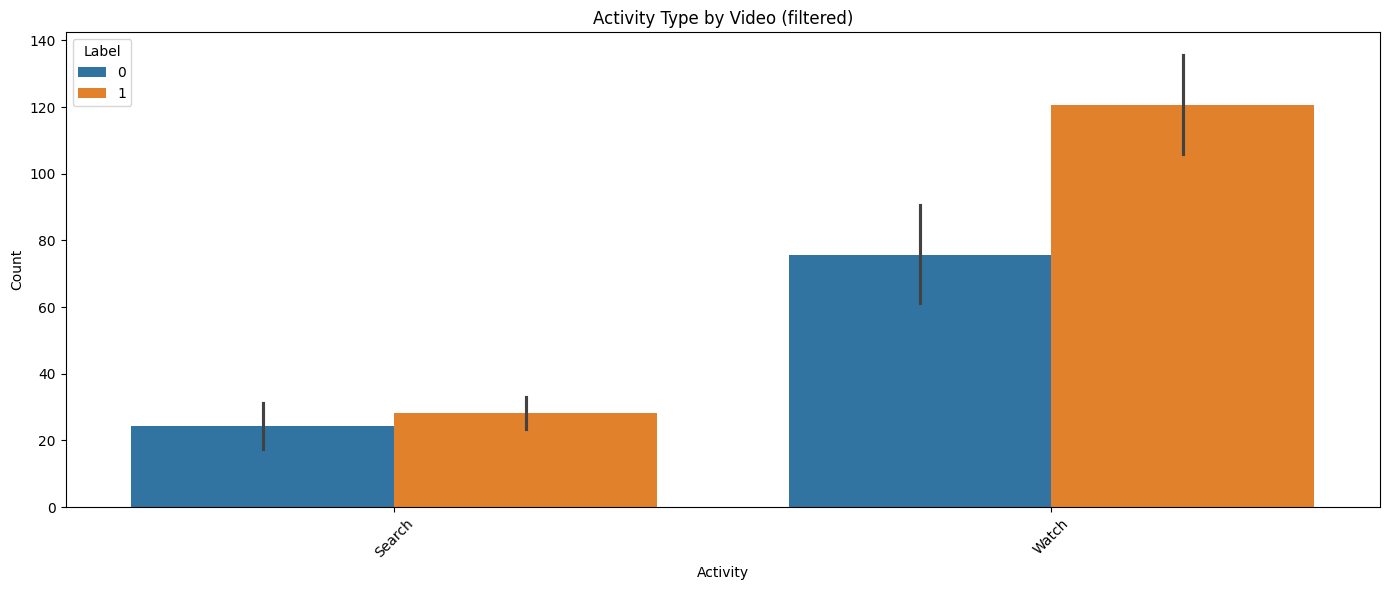

In [20]:
video_activity = all_result.groupby(['vid_title', 'activity', 'label']).size().reset_index(name='count')

filtered = video_activity.groupby('vid_title')['count'].sum()
filtered_titles = filtered[filtered > 50].index

plt.figure(figsize=(14, 6))
sns.barplot(data=video_activity[video_activity['vid_title'].isin(filtered_titles)],
            x='activity', y='count', hue='label')
plt.title("Activity Type by Video (filtered)")
plt.xlabel("Activity")
plt.ylabel("Count")
plt.legend(title="Label")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

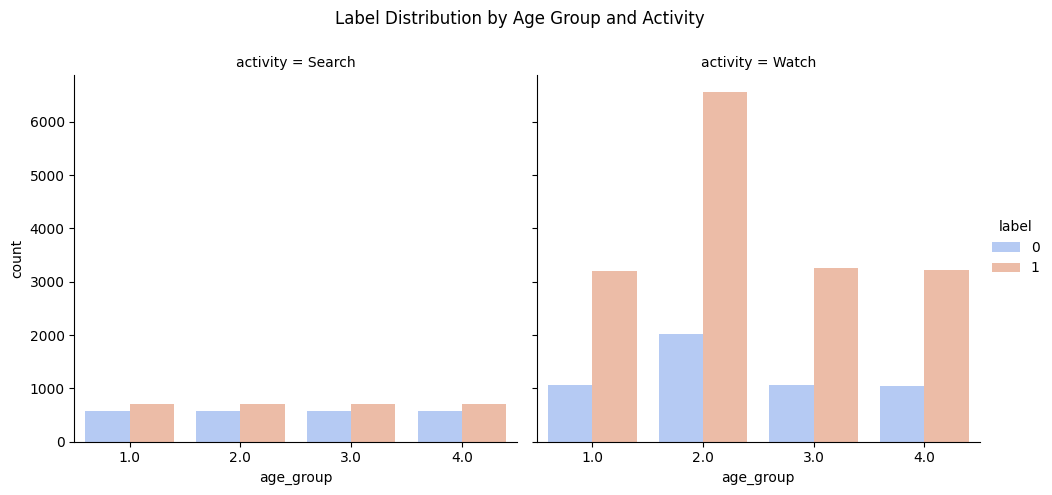

In [21]:
multi_group = all_result.groupby(['age_group', 'activity', 'label']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.catplot(data=multi_group, x='age_group', y='count', hue='label', col='activity',
            kind='bar', palette='coolwarm', height=5, aspect=1)
plt.subplots_adjust(top=0.85)
plt.suptitle("Label Distribution by Age Group and Activity")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shlomias\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


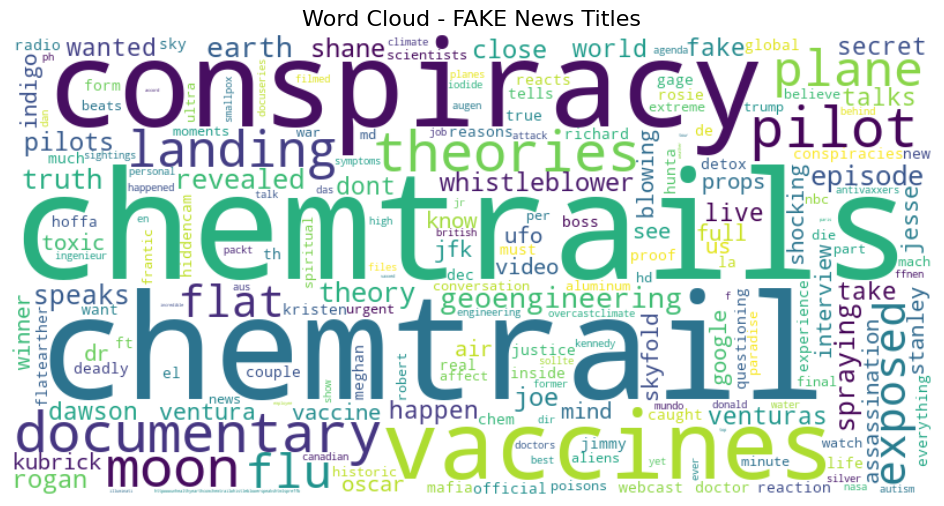

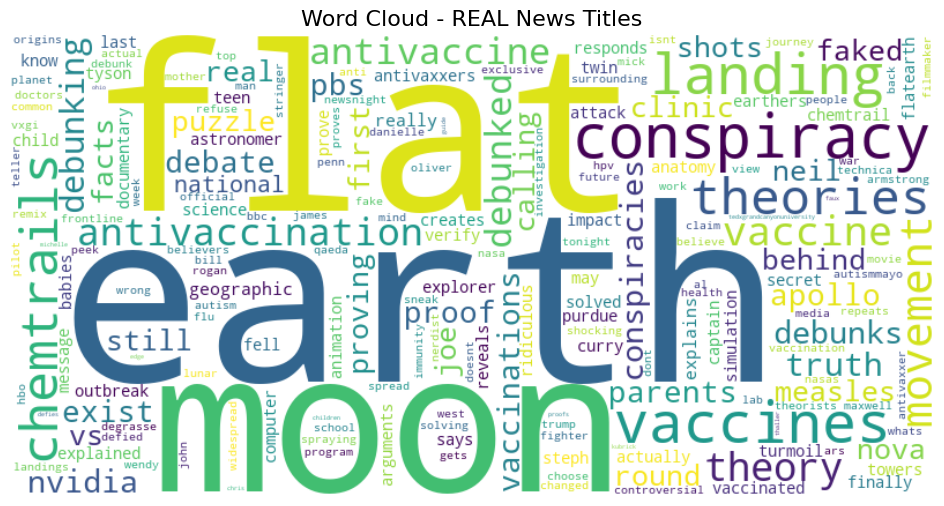

In [29]:
all_result.rename(columns={'vid_title': 'title'}, inplace=True)    

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

def generate_wordcloud_for_title(df, label_value, title):
    subset = df[df['label'] == label_value]
    all_titles = ' '.join(subset['title'].dropna().apply(clean_text))
    words = all_titles.split()
    filtered_words = [w for w in words if w not in stop_words]
    word_counts = Counter(filtered_words)
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()
    
generate_wordcloud_for_title(all_result, 0, "Word Cloud - FAKE News Titles")
generate_wordcloud_for_title(all_result, 1, "Word Cloud - REAL News Titles")

Main conclusions from the headlines of fake news (Fake News Titles)
Prominent words:

Chemtrails, Conspirac, Vaccines, Moon, Flat, Pilot, Spriering, Toxic, Secret, Hoffa, FLU, GEONGINEERING

Prominent features:
- provocative and conspiracy language:
- Frequent use of words such as "Conspicy", "Secret", "Exposed", "Spriering", "Whistleblower".
- Creating a secret discovery, hint of hidden truth, or global plot.
- Focus on false issues or incorrect science: 
- Topics like chemtrails, flat eart, vaccines in a false and misleading way. 
- Theories that are identified with disinformation - especially around vaccines and events like landing on the moon.
- Dramatic and emotional tone: lots of strong descriptions such as Toxic, Shocking, Deadly, Reveled.

Main conclusions from the headlines of real news (Real News Titles)
Prominent words:

Earth, Moon, Flat, DEBUNKING, PROOF, FIRST, SCIENCE, EXPLINED, REAL, VACCINES, DEBATE, APOLO

Prominent features:
- Analytical and factual language:
- Use of words such as "Debunking", "Explaine", "ProVing", "Facts", "Real" transmits anchor in reality and science.
- Many of the headlines are engaged in distinguishing conspiracy theories and not promoting.
- focus on science and education: 
- Topics such as APOLLO, Vaccines, Earth, Moon appear with scientific and research, not conspiracy. 
- Words like Geographic, Astronomer, PBS, Clinic, Documentary indicates qualified sources.

#  BuzzFead Facebook Dataset

In [30]:
BuzzFead_Facebook = data_io.load_csv(r'data/facebook-fact-check.csv')
BuzzFead_Facebook["label"] = 0

In [31]:
BuzzFead_Facebook.describe()

account_id       post_id   share_count  reaction_count  \
count  2.282000e+03  2.282000e+03  2.212000e+03     2280.000000   
mean   1.867111e+14  3.299586e+15  4.044816e+03     5364.284649   
std    1.393826e+14  3.808724e+15  2.983192e+04    19126.544561   
min    6.231759e+10  5.510967e+14  1.000000e+00        2.000000   
25%    1.145179e+14  1.247441e+15  2.400000e+01      149.000000   
50%    1.840966e+14  1.290536e+15  9.600000e+01      545.500000   
75%    3.469371e+14  1.540752e+15  7.390000e+02     2416.750000   
max    4.401065e+14  1.015386e+16  1.088995e+06   456458.000000   

       comment_count   label  
count    2280.000000  2282.0  
mean      516.102193     0.0  
std      3569.355445     0.0  
min         0.000000     0.0  
25%        37.000000     0.0  
50%       131.500000     0.0  
75%       390.250000     0.0  
max    159047.000000     0.0

In [32]:
BuzzFead_Facebook["label"].value_counts()

label
0    2282
Name: count, dtype: int64

In [33]:
BuzzFead_Facebook.head()

account_id           post_id    Category               Page  \
0  184096565021911  1035057923259100  mainstream  ABC News Politics   
1  184096565021911  1035269309904628  mainstream  ABC News Politics   
2  184096565021911  1035305953234297  mainstream  ABC News Politics   
3  184096565021911  1035322636565962  mainstream  ABC News Politics   
4  184096565021911  1035352946562931  mainstream  ABC News Politics   

                                            Post URL Date Published Post Type  \
0  https://www.facebook.com/ABCNewsPolitics/posts...     2016-09-19     video   
1  https://www.facebook.com/ABCNewsPolitics/posts...     2016-09-19      link   
2  https://www.facebook.com/ABCNewsPolitics/posts...     2016-09-19      link   
3  https://www.facebook.com/ABCNewsPolitics/posts...     2016-09-19      link   
4  https://www.facebook.com/ABCNewsPolitics/posts...     2016-09-19     video   

               Rating Debate  share_count  reaction_count  comment_count  \
0  no factual content    NaN          NaN           146.0           15.0   
1         mostly true    NaN          1.0            33.0           34.0   
2         mostly true    NaN         34.0            63.0           27.0   
3         mostly true    NaN         35.0           170.0           86.0   
4         mostly true    NaN        568.0          3188.0         2815.0   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

In [34]:
map_rating = {"mostly true": 1.0,
            "mixture of true and false": 0.5,
            "no factual content": 0.25,
            "mostly false": 0.0}
BuzzFead_Facebook['rating'] = BuzzFead_Facebook['Rating'].str.lower().map(map_rating)
BuzzFead_Facebook['label'] = (BuzzFead_Facebook['Rating'].str.lower() == 'mostly true').astype(int)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'mostly true'),
  Text(1, 0, 'no factual content'),
  Text(2, 0, 'mixture of true and false'),
  Text(3, 0, 'mostly false')])

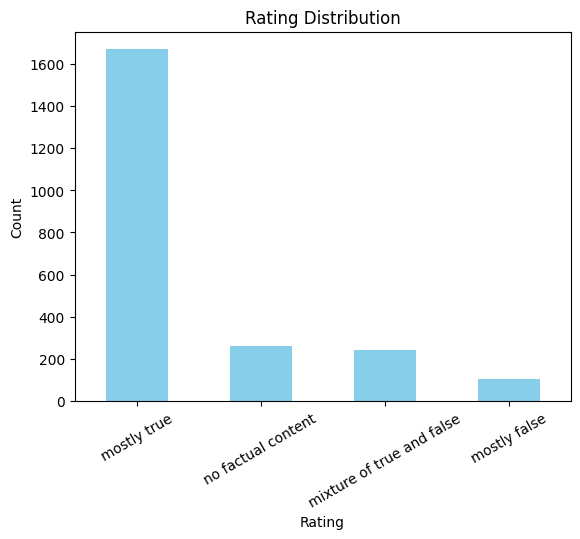

In [35]:
BuzzFead_Facebook['Rating'].value_counts().plot(kind='bar', color='skyblue', title='Rating Distribution')
plt.ylabel("Count")
plt.xticks(rotation=30)

<Axes: title={'center': 'True vs. Not True Content'}, ylabel='count'>

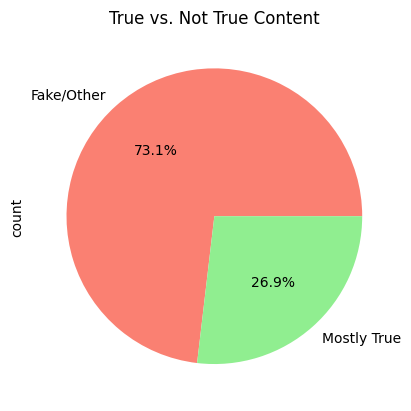

In [36]:
BuzzFead_Facebook['label'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Fake/Other', 'Mostly True'], colors=['salmon', 'lightgreen'], title='True vs. Not True Content')

Text(0, 0.5, 'Average Count')

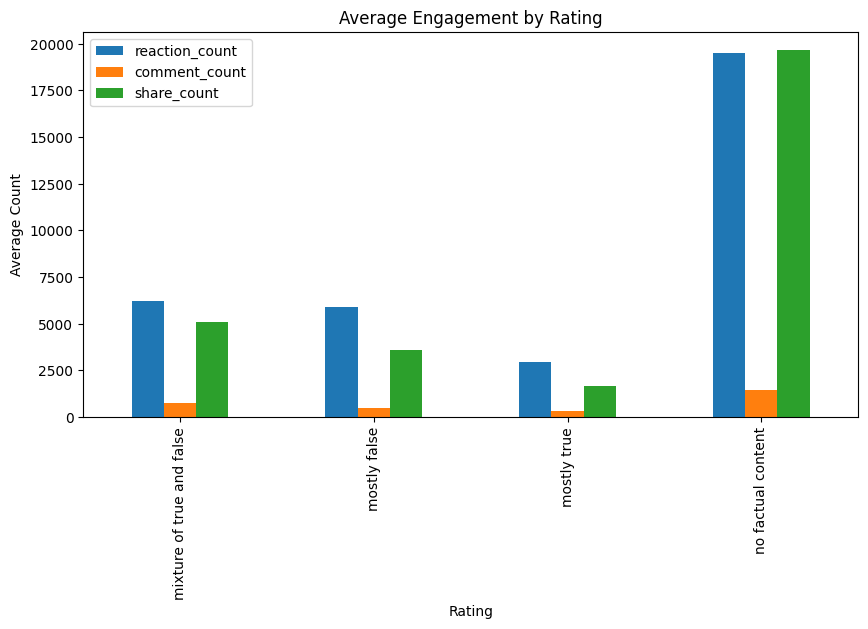

In [37]:
BuzzFead_Facebook.groupby('Rating')[['reaction_count', 'comment_count', 'share_count']].mean().plot(kind='bar', figsize=(10, 5), title='Average Engagement by Rating')
plt.ylabel("Average Count")

Text(0, 0.5, 'Count')

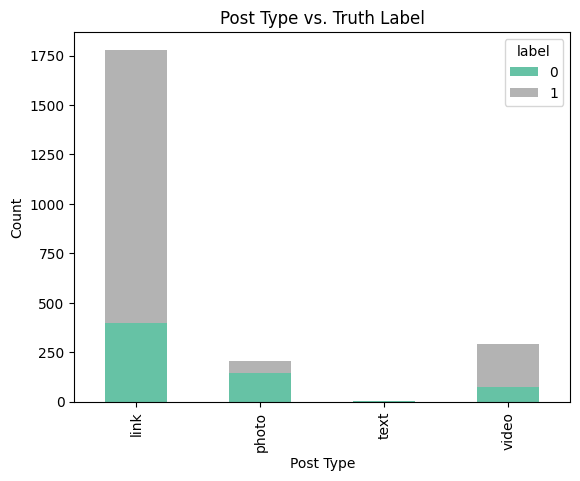

In [38]:
pd.crosstab(BuzzFead_Facebook['Post Type'], BuzzFead_Facebook['label']).plot(kind='bar', stacked=True, title='Post Type vs. Truth Label', colormap='Set2')
plt.ylabel("Count")

In [40]:
BuzzFead_Facebook.groupby('label')[['reaction_count', 'comment_count', 'share_count']].median()

reaction_count  comment_count  share_count
label                                            
0              1475.0          178.0        674.0
1               404.0          122.0         57.0

#  BanFakeNews Dataset

In [41]:
BanFakeNews_Authentic = data_io.load_csv(r'data/BanFakeNews/Authentic.csv')
BanFakeNews_FakeNews = data_io.load_csv(r'data/BanFakeNews/FakeNews.csv')
BanFakeNews_labeledAuthentic = data_io.load_csv(r'data/BanFakeNews/LabeledAuthentic.csv')
BanFakeNews_labeledFakeNews = data_io.load_csv(r'data/BanFakeNews/LabeledFake.csv')

In [3]:
BanFakeNews_Authentic.columns

Index(['articleID', 'domain', 'date', 'category', 'headline', 'content',
       'label'],
      dtype='object')

In [4]:
BanFakeNews_FakeNews.columns

Index(['articleID', 'domain', 'date', 'category', 'headline', 'content',
       'label'],
      dtype='object')

In [5]:
BanFakeNews_labeledAuthentic.columns

Index(['articleID', 'domain', 'date', 'category', 'source', 'relation',
       'headline', 'content', 'label'],
      dtype='object')

In [6]:
BanFakeNews_labeledFakeNews.columns

Index(['articleID', 'domain', 'date', 'category', 'source', 'relation',
       'headline', 'content', 'label', 'F-type'],
      dtype='object')

In [42]:
combined_df = pd.concat([
    BanFakeNews_Authentic,
    BanFakeNews_FakeNews,
    BanFakeNews_labeledAuthentic,
    BanFakeNews_labeledFakeNews
], sort=False, ignore_index=True)
combined_df.to_csv('data/BanFakeNews/banfakenews_merged_full.csv', index=False)

BanFakeNews = data_io.load_csv(r'data/BanFakeNews/banfakenews_merged_full.csv')

In [43]:
BanFakeNews.head()

articleID          domain                 date   category  \
0          1  jagonews24.com  2018-09-19 17:48:18  Education   
1          2  jagonews24.com  2018-09-19 17:48:19   National   
2          3  jagonews24.com  2018-09-19 17:48:20   National   
3          4  jagonews24.com  2018-09-19 17:48:21      Crime   
4          5  jagonews24.com  2018-09-19 17:48:21   National   

                                            headline  \
0   হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ   
1    মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ   
2  প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...   
3  মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...   
4         টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু   

                                             content  label source relation  \
0  গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...    1.0    NaN      NaN   
1  বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...    1.0    NaN      NaN   
2  নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...    1.0    NaN      NaN   
3  সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...    1.0    NaN      NaN   
4  মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...    1.0    NaN      NaN   

  F-type  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN

In [50]:
from langdetect import detect, LangDetectException
from deep_translator import GoogleTranslator

def detect_lang(text):
    if not isinstance(text, str) or not text.strip():
        return None
    try:
        return detect(text)
    except LangDetectException:
        return None

def translate(text, source_lang, target_lang='en'):
    translator = GoogleTranslator(source=source_lang, target=target_lang)
    return translator.translate(text)

In [51]:
lang = detect_lang("ইউটিলাইজ করার ব্যাপারে দু'ইউনিট বসবাস")
lang

'bn'

In [52]:
translate("ইউটিলাইজ করার ব্যাপারে দু'ইউনিট বসবাস",lang)

'Two units about utilizing'

In [53]:
BanFakeNews.describe()

articleID         label
count  58478.000000  58478.000000
mean   26178.306868      0.955573
std    19379.622643      0.206044
min        1.000000      0.000000
25%     7094.000000      1.000000
50%    24555.500000      1.000000
75%    43085.750000      1.000000
max    61780.000000      1.000000

In [54]:
BanFakeNews.isnull().sum()

articleID        0
domain           0
date             0
category         0
headline         0
content          0
label            0
source       49977
relation     49977
F-type       57179
dtype: int64

In [55]:
BanFakeNews["label"].value_counts()

label
1.0    55880
0.0     2598
Name: count, dtype: int64

Text(0, 0.5, 'Number of Articles')

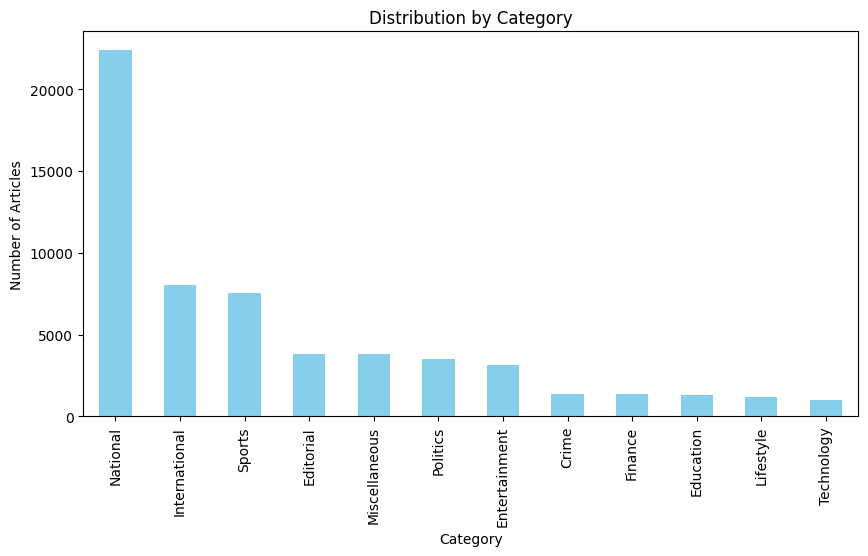

In [56]:
BanFakeNews['category'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue', title='Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')

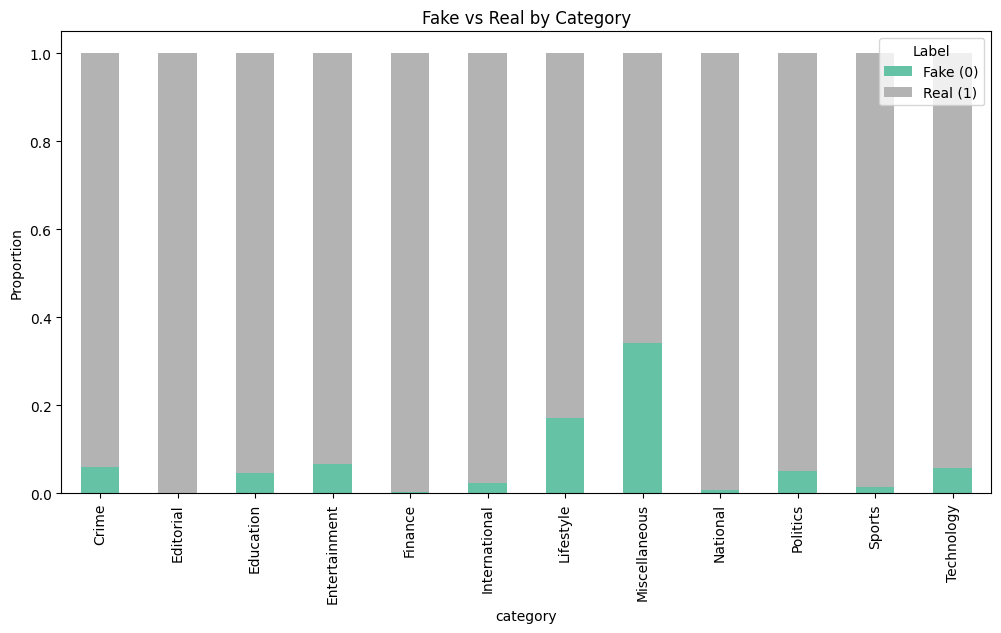

In [58]:
category_label = BanFakeNews.groupby('category')['label'].value_counts(normalize=True).unstack().fillna(0)
category_label.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2', title='Fake vs Real by Category')
plt.ylabel("Proportion")
plt.legend(title='Label', labels=['Fake (0)', 'Real (1)'])

1. Most articles are real
In almost all categories, the real content rate (Label = 1) is very high - over 90%, sometimes even 100%.

2. The categories with the most Pike (Label = 0) are:

- miscellanous
About 33% of articles in this category are Pike.

This is the category with the highest pike rate.

It may have less supervision, or these are general content that is easy to distribute through them.

- lifestyle
About 17% Pike.

Life -style content may be popular and easy to share, so disinformation creators attracts.

- Entertainment, Crime, Education, Technology

Contain a relatively small amount of Pike articles (5-8%).

3. Categories with zero or almost zero pike: Politics, National, Editorial, Finance, Sports, International

Almost all the content in these categories was classified as true.

May indicate quality supervision or reliable source.

Text(0, 0.5, 'Number of Articles')

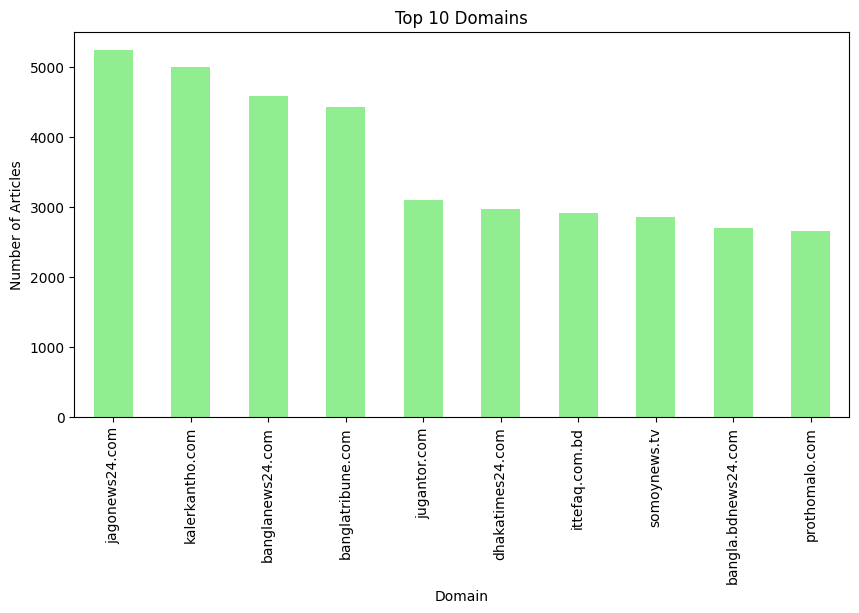

In [57]:
BanFakeNews['domain'].value_counts().head(10).plot(kind='bar', figsize=(10, 5), color='lightgreen', title='Top 10 Domains')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')

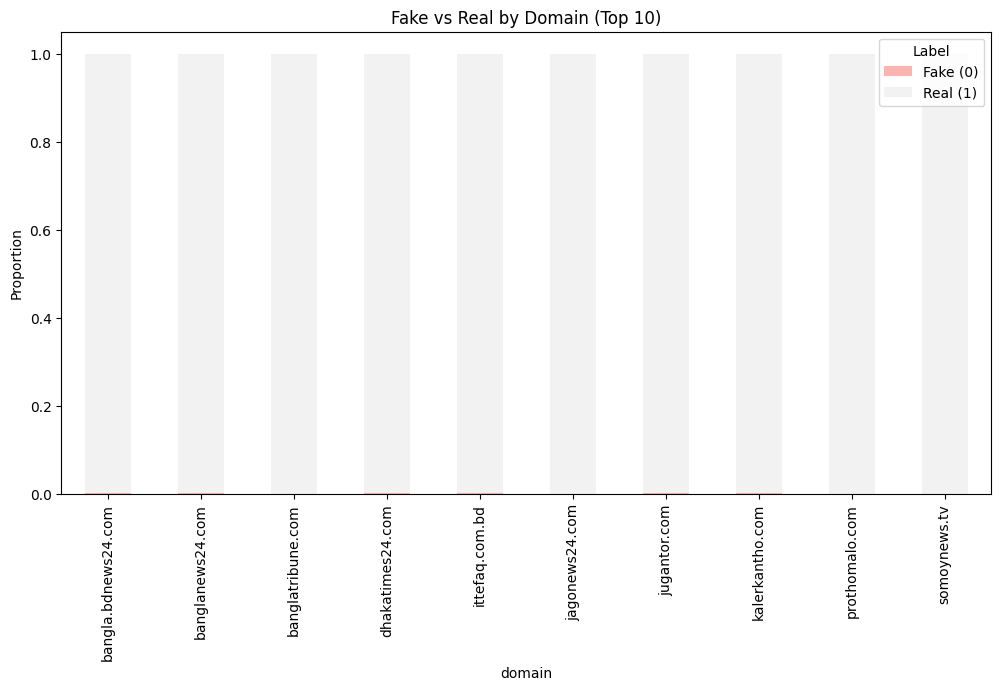

In [59]:
top_domains = BanFakeNews['domain'].value_counts().head(10).index
domain_label = BanFakeNews[BanFakeNews['domain'].isin(top_domains)].groupby('domain')['label'].value_counts(normalize=True).unstack().fillna(0)
domain_label.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Pastel1', title='Fake vs Real by Domain (Top 10)')
plt.ylabel("Proportion")
plt.legend(title='Label', labels=['Fake (0)', 'Real (1)'])

Text(0.5, 1.0, 'Article Count by Domain and Category')

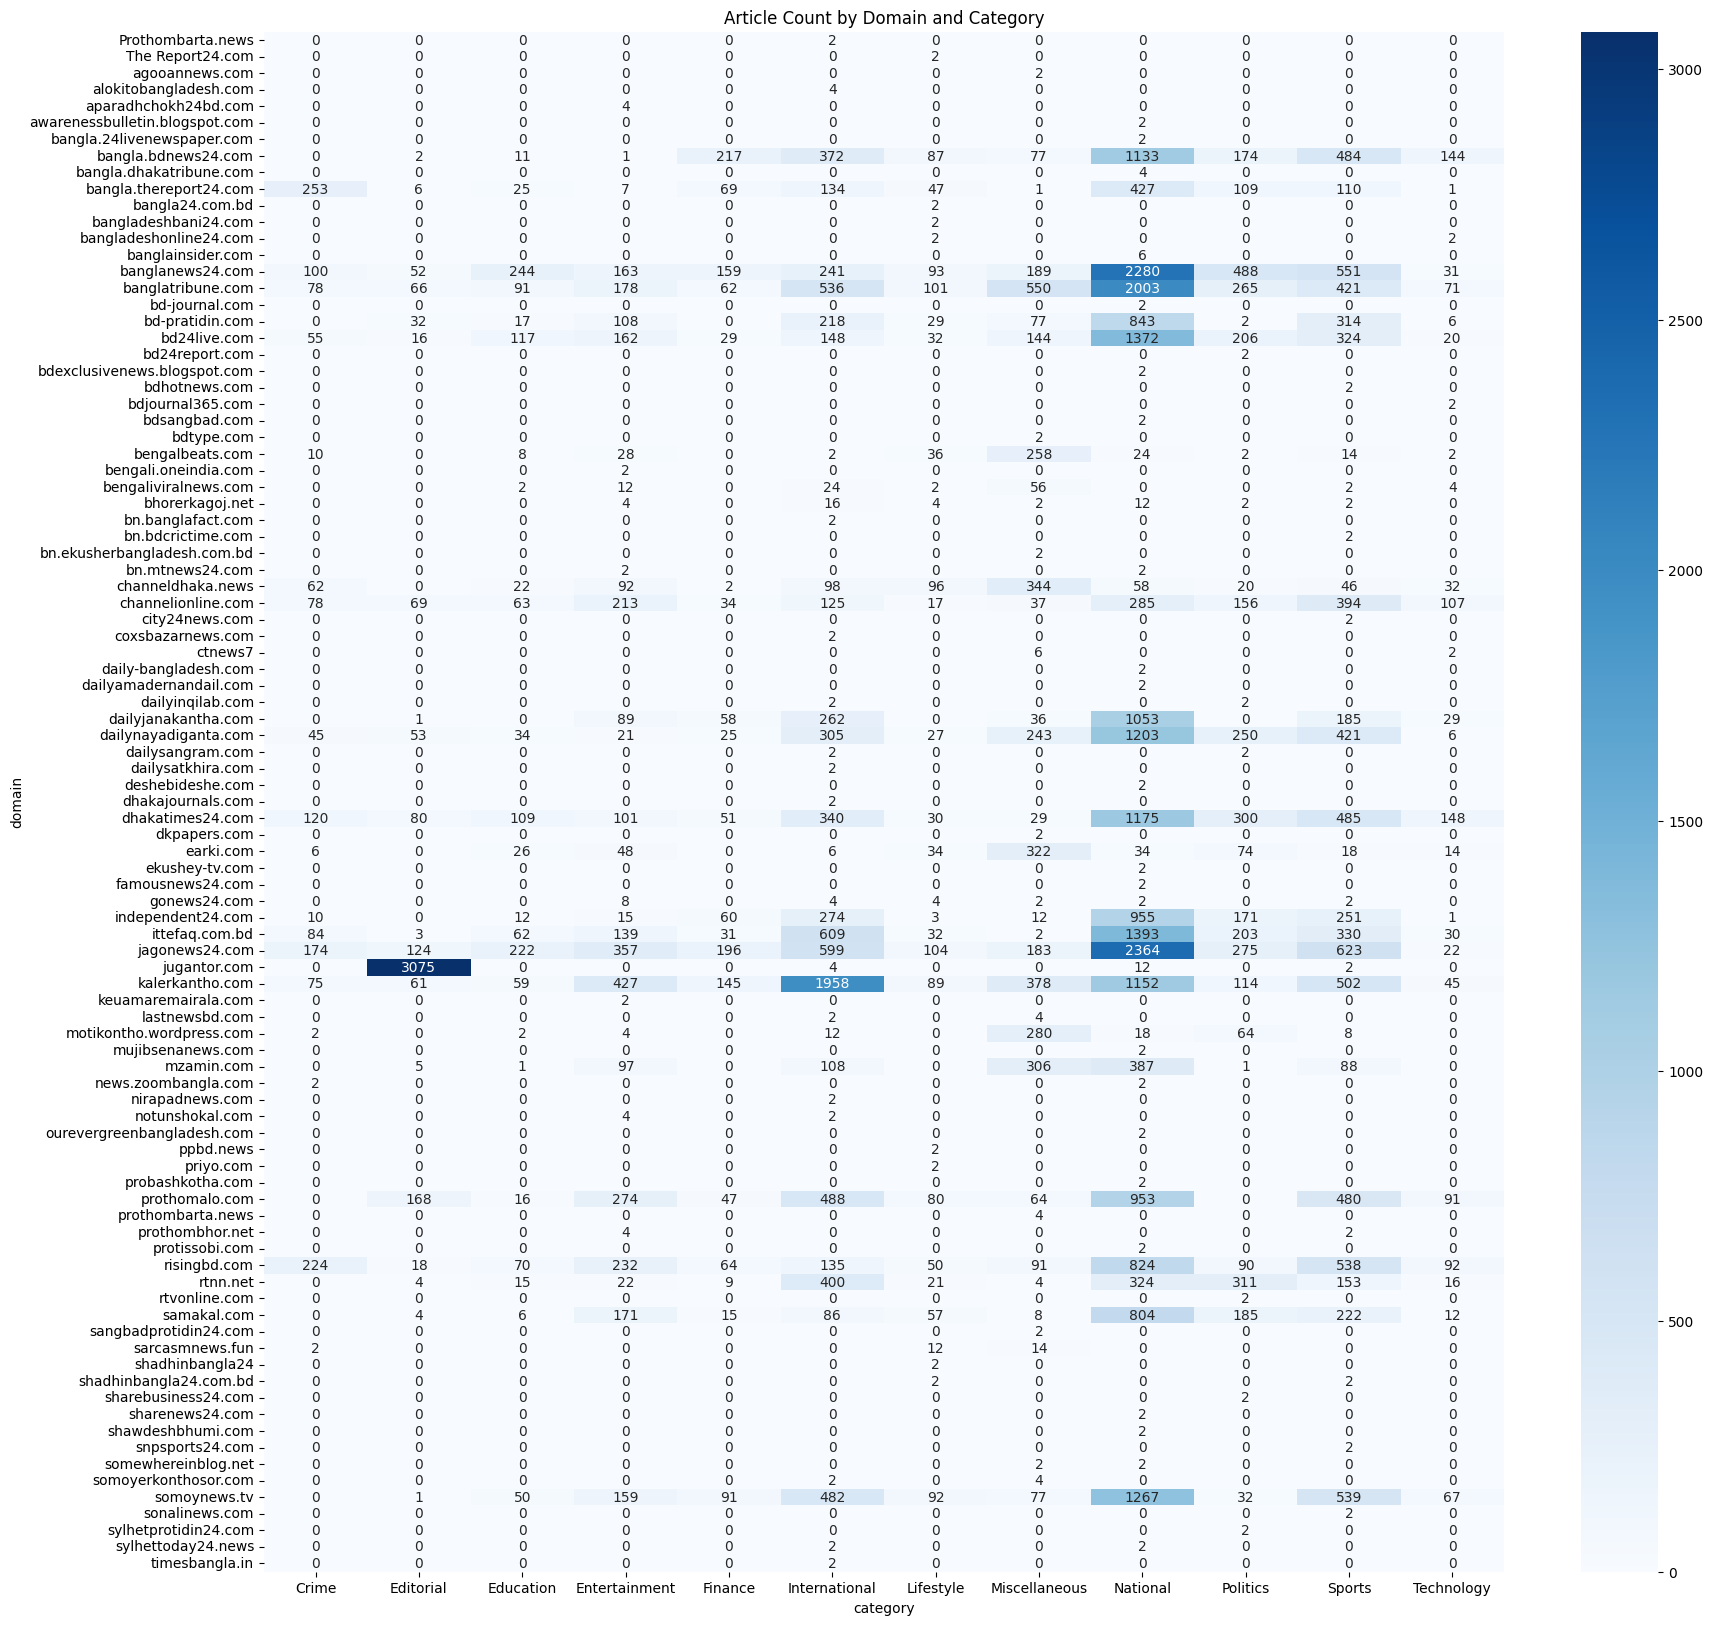

In [62]:
pivot_table = BanFakeNews.pivot_table(index='domain', columns='category', values='label', aggfunc='count', fill_value=0)
plt.figure(figsize=(20, 20))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')
plt.title("Article Count by Domain and Category")

# FakeNewsBot

In [64]:
FakeNewsBot = data_io.load_csv(r'data/FakeNewsBot.csv')

In [65]:
FakeNewsBot.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [66]:
FakeNewsBot["label"].value_counts()

label
1    10413
0    10387
Name: count, dtype: int64

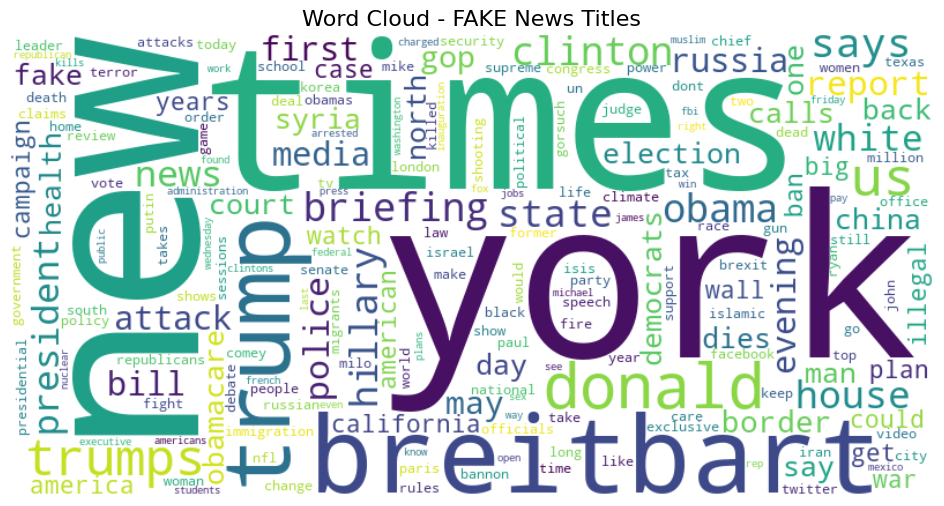

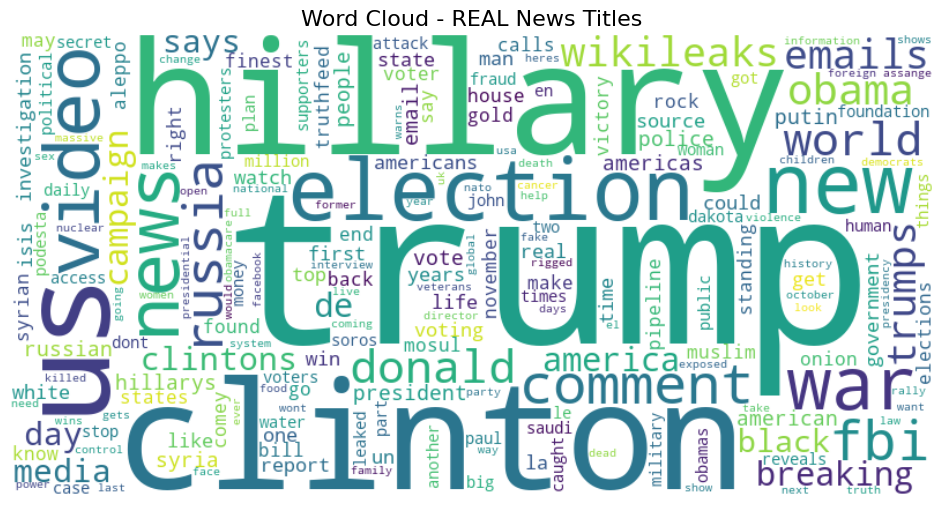

In [67]:
generate_wordcloud(FakeNewsBot, 0, "Word Cloud - FAKE News Titles")
generate_wordcloud(FakeNewsBot, 1, "Word Cloud - REAL News Titles")

Main conclusions from Pike News's words:
Prominent words:

Breitbart, York, New, Times, Trump, Hillary, Clinton, Obama, Border, Mexico.

- There is heavy use of political characters - especially from the right side of the map.

- Recurrent appearance of ideological identified media bodies like Breitbart.

- die and content:

High focus on conspiracies, immigration, and borders (Border, Wall, Mexico).

- There is a evidence of the presence of words like Attack, Fake, Dead, Terror, Ban - suggesting the use of scared techniques or particularly dramatic headlines.

- Use of Envy:

Many more political entities - a phenomenon that implies an attempt to influence or promote an ideological narrative through disinformation.

Conclusions from the words of real news:
Prominent words:

Trump, Clinton, Hillary, Election, Russia, Wikileaks, Emails, FBI, Video, Comment.

- die and content:

The headlines deal with familiar topical issues: elections, investigations, FBI, exterior and security.

Sometimes topics that are at a conspiracy-reality junction (such as Wikileaks, Emails) also appear, but the context is different-more informative and less sensational.

- language and terminology:

Less dramatic or emotional words.

More use of neutral and factual terminology (Report, Comment, Video, News).

In [68]:
df = FakeNewsBot.copy()
label_counts = df['label'].value_counts(normalize=True).rename_axis('Label').reset_index(name='Proportion')
top_authors = df['author'].value_counts().head(10).rename_axis('Author').reset_index(name='Articles')
df['text_length'] = df['text'].astype(str).apply(len)
text_length_summary = df.groupby('label')['text_length'].describe()
text_length_summary

count         mean          std  min     25%     50%     75%  \
label                                                                   
0      10387.0  5214.130452  4313.791236  3.0  2397.0  4591.0  7015.0   
1      10413.0  3875.911649  5753.628976  1.0  1043.0  2351.0  4801.0   

            max  
label            
0       85948.0  
1      142961.0

In [70]:
opensources_fake_news = data_io.load_csv("data/FakeNewsDataset/opensources_fake_news_cleaned.csv","polars")

In [71]:
opensources_fake_news.head()

shape: (5, 8)
┌─────────┬───────────┬────────────┬────────────┬────────────┬────────────┬────────────┬───────────┐
│ id      ┆ type      ┆ domain     ┆ scraped_at ┆ url        ┆ authors    ┆ title      ┆ content   │
│ ---     ┆ ---       ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---       │
│ i64     ┆ str       ┆ str        ┆ str        ┆ str        ┆ str        ┆ str        ┆ str       │
╞═════════╪═══════════╪════════════╪════════════╪════════════╪════════════╪════════════╪═══════════╡
│ 4059478 ┆ political ┆ dailycalle ┆ 2017-11-27 ┆ http://dai ┆ null       ┆ The top 6  ┆ To commem │
│         ┆           ┆ r.com      ┆            ┆ lycaller.c ┆            ┆ bloggers   ┆ orate     │
│         ┆           ┆            ┆            ┆ om/2010/03 ┆            ┆ &/or       ┆ this      │
│         ┆           ┆            ┆            ┆ …          ┆            ┆ person…    ┆ week’s    │
│         ┆           ┆            ┆            ┆            ┆            ┆            ┆ lau…      │
│ 4059479 ┆ bias      ┆ lifenews.c ┆ 2017-11-27 ┆ https://co ┆ Greg Scott ┆ Iran Now   ┆ FAIR USE  │
│         ┆           ┆ om         ┆            ┆ nsciouslif ┆            ┆ Blamed for ┆ NOTICE.   │
│         ┆           ┆            ┆            ┆ enews.com/ ┆            ┆ 9/11       ┆ Many of   │
│         ┆           ┆            ┆            ┆ …          ┆            ┆            ┆ the s…    │
│ 4059480 ┆ political ┆ dailycalle ┆ 2017-11-27 ┆ http://dai ┆ Jeff       ┆ The Daily  ┆ New       │
│         ┆           ┆ r.com      ┆            ┆ lycaller.c ┆ Winkler,   ┆ Caller     ┆ Hampshire │
│         ┆           ┆            ┆            ┆ om/buzz/ma ┆ Jonathan   ┆            ┆ is the    │
│         ┆           ┆            ┆            ┆ …          ┆ Strong,…   ┆            ┆ state     │
│         ┆           ┆            ┆            ┆            ┆            ┆            ┆ wit…      │
│ 4059482 ┆ fake      ┆ coed.com   ┆ 2017-11-27 ┆ https://co ┆ President, ┆ Abigail    ┆ Abigail   │
│         ┆           ┆            ┆            ┆ ed.com/201 ┆ Executive  ┆ Ratchford  ┆ Ratchford │
│         ┆           ┆            ┆            ┆ 4/08/29/ab ┆ Editor - … ┆ is Winning ┆ ‘s        │
│         ┆           ┆            ┆            ┆ …          ┆            ┆ I…         ┆ Instagram │
│         ┆           ┆            ┆            ┆            ┆            ┆            ┆ …         │
│ 4059484 ┆ fake      ┆ coed.com   ┆ 2017-11-27 ┆ https://co ┆ null       ┆ How To:    ┆ Nothing   │
│         ┆           ┆            ┆            ┆ ed.com/201 ┆            ┆ Have Sex   ┆ says “I   │
│         ┆           ┆            ┆            ┆ 0/04/09/ho ┆            ┆ In A Car   ┆ love you” │
│         ┆           ┆            ┆            ┆ …          ┆            ┆            ┆ like…     │
└─────────┴───────────┴────────────┴────────────┴────────────┴────────────┴────────────┴───────────┘

In [72]:
opensources_fake_news['type'].value_counts().sort('count', descending=True)
# opensources_fake_news['type'].value_counts().write_csv("types_counts.csv")

shape: (12, 2)
┌────────────┬─────────┐
│ type       ┆ count   │
│ ---        ┆ ---     │
│ str        ┆ u32     │
╞════════════╪═════════╡
│ reliable   ┆ 1807323 │
│ political  ┆ 968205  │
│ bias       ┆ 769874  │
│ fake       ┆ 762178  │
│ conspiracy ┆ 494184  │
│ …          ┆ …       │
│ clickbait  ┆ 174176  │
│ unreliable ┆ 104537  │
│ satire     ┆ 84735   │
│ junksci    ┆ 79099   │
│ hate       ┆ 64763   │
└────────────┴─────────┘

reliable,1807323
unknown,230532
hate,64763
unreliable,104537
satire,84735
clickbait,174176
junksci,79099
bias,769874
rumor,375963
fake,762178
conspiracy,494184
political,968205

In [73]:
def label_verdict(t):
    if t in ["fake", "satire", "unreliable", "clickbait", "rumor", "conspiracy", "hate", "bias", "junksci"]:
        return "fake"
    elif t in ["reliable"]:
        return "real"
    else:
        return "irrelevant"

opensources_fake_news = opensources_fake_news.with_columns([
    opensources_fake_news["type"].map_elements(label_verdict).alias("verdict")
])

opensources_fake_news['verdict'].value_counts().sort('count', descending=True)

C:\Users\shlomias\AppData\Local\Temp\ipykernel_9816\2406979966.py:10: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  opensources_fake_news["type"].map_elements(label_verdict).alias("verdict")


shape: (3, 2)
┌────────────┬─────────┐
│ verdict    ┆ count   │
│ ---        ┆ ---     │
│ str        ┆ u32     │
╞════════════╪═════════╡
│ fake       ┆ 2909509 │
│ real       ┆ 1807323 │
│ irrelevant ┆ 1198737 │
└────────────┴─────────┘

In [74]:
opensources_fake_news.null_count()

shape: (1, 9)
┌─────┬──────┬────────┬────────────┬───┬─────────┬───────┬─────────┬─────────┐
│ id  ┆ type ┆ domain ┆ scraped_at ┆ … ┆ authors ┆ title ┆ content ┆ verdict │
│ --- ┆ ---  ┆ ---    ┆ ---        ┆   ┆ ---     ┆ ---   ┆ ---     ┆ ---     │
│ u32 ┆ u32  ┆ u32    ┆ u32        ┆   ┆ u32     ┆ u32   ┆ u32     ┆ u32     │
╞═════╪══════╪════════╪════════════╪═══╪═════════╪═══════╪═════════╪═════════╡
│ 0   ┆ 0    ┆ 0      ┆ 0          ┆ … ┆ 2279919 ┆ 1381  ┆ 0       ┆ 0       │
└─────┴──────┴────────┴────────────┴───┴─────────┴───────┴─────────┴─────────┘

<Axes: >

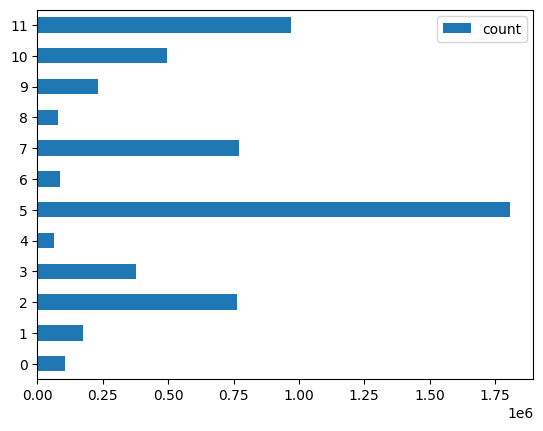

In [77]:
opensources_fake_news['type'].value_counts().to_pandas().plot(kind='barh')

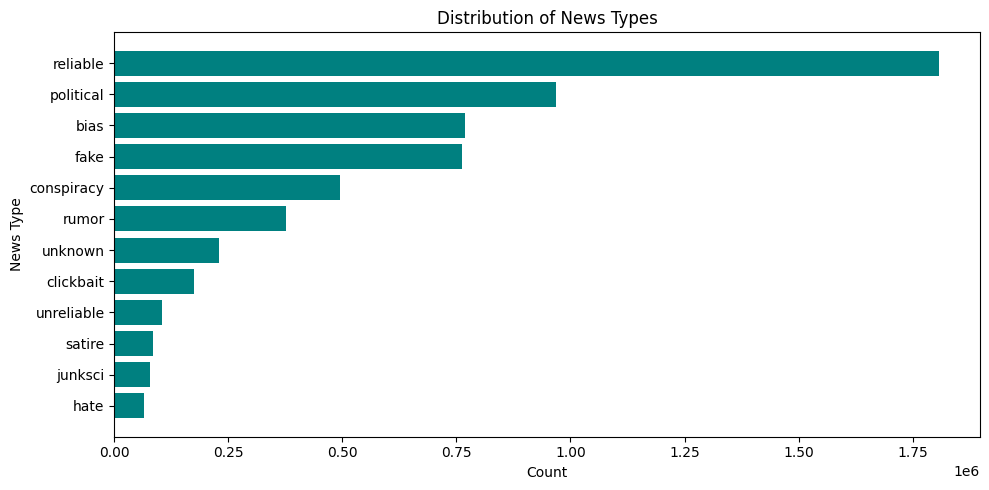

In [80]:
df = opensources_fake_news

type_counts = df.group_by('type').len().sort('len', descending=True)

type_counts_pd = type_counts.to_pandas()

plt.figure(figsize=(10, 5))
plt.barh(type_counts_pd['type'], type_counts_pd['len'], color='teal')
plt.title('Distribution of News Types')
plt.xlabel('Count')
plt.ylabel('News Type')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


shape: (10, 2)
┌────────────────────┬─────────┐
│ domain             ┆ len     │
│ ---                ┆ ---     │
│ str                ┆ u32     │
╞════════════════════╪═════════╡
│ nytimes.com        ┆ 1463646 │
│ beforeitsnews.com  ┆ 679151  │
│ dailykos.com       ┆ 392535  │
│ express.co.uk      ┆ 372458  │
│ sputniknews.com    ┆ 184380  │
│ abovetopsecret.com ┆ 164603  │
│ pravda.ru          ┆ 84468   │
│ dailycaller.com    ┆ 62873   │
│ rawstory.com       ┆ 57955   │
│ breitbart.com      ┆ 54509   │
└────────────────────┴─────────┘


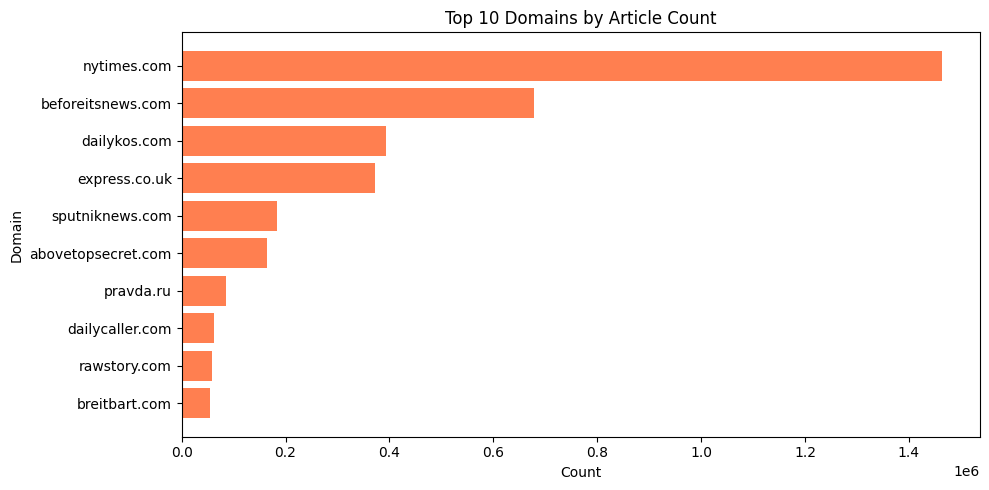

In [81]:
top_domains = (
    df.group_by('domain')
      .len()
      .sort('len', descending=True)
      .head(10)
)
print(top_domains)

top_domains_pd = top_domains.to_pandas()
plt.figure(figsize=(10, 5))
plt.barh(top_domains_pd['domain'], top_domains_pd['len'], color='coral')
plt.title('Top 10 Domains by Article Count')
plt.xlabel('Count')
plt.ylabel('Domain')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [83]:
pivot = (
    df.group_by(['domain', 'type'])
      .len()
      .pivot(values='len', index='domain', columns='type')
      .fill_null(0)
)

pivot_total = pivot.with_columns([
    (pl.sum_horizontal(pivot.columns[1:])).alias("total")
])
for col in ['bias', 'conspiracy', 'fake', 'political', 'junksci', 'unreliable', 'satire']:
    if col in pivot_total.columns:
        pivot_total = pivot_total.with_columns([
            (pl.col(col) / pl.col("total")).alias(f"{col}_percent")
        ])

print(pivot_total.head(5))


shape: (5, 21)
┌────────────┬────────────┬─────────┬───────┬───┬────────────┬────────────┬────────────┬───────────┐
│ domain     ┆ conspiracy ┆ unknown ┆ bias  ┆ … ┆ political_ ┆ junksci_pe ┆ unreliable ┆ satire_pe │
│ ---        ┆ ---        ┆ ---     ┆ ---   ┆   ┆ percent    ┆ rcent      ┆ _percent   ┆ rcent     │
│ str        ┆ u32        ┆ u32     ┆ u32   ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---       │
│            ┆            ┆         ┆       ┆   ┆ f64        ┆ f64        ┆ f64        ┆ f64       │
╞════════════╪════════════╪═════════╪═══════╪═══╪════════════╪════════════╪════════════╪═══════════╡
│ awarenessa ┆ 6976       ┆ 0       ┆ 0     ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0        ┆ 0.0       │
│ ct.com     ┆            ┆         ┆       ┆   ┆            ┆            ┆            ┆           │
│ therebel.m ┆ 0          ┆ 5613    ┆ 0     ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0        ┆ 0.0       │
│ edia       ┆            ┆         ┆       ┆   ┆            ┆            ┆ 

C:\Users\shlomias\AppData\Local\Temp\ipykernel_9816\3702495394.py:4: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  .pivot(values='len', index='domain', columns='type')


In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

def get_top_words(df, label_value, label_col='verdict', text_col='content', top_n=20):
    filtered_df = df.filter(pl.col(label_col) == label_value)
    texts = filtered_df.select(text_col).to_series()
    all_text = ' '.join([clean_text(t) for t in texts if t is not None])
    words = all_text.split()
    filtered_words = [w for w in words if w not in stop_words]
    word_counts = Counter(filtered_words)
    return word_counts.most_common(top_n)

def get_top_words_efficient(df, label_value, label_col='verdict', text_col='content', top_n=20):
    filtered_df = df.filter(pl.col(label_col) == label_value)
    word_counter = Counter()
    for text in filtered_df.select(text_col).to_series():
        if text is not None:
            cleaned = clean_text(text)
            words = [w for w in cleaned.split() if w not in stop_words]
            word_counter.update(words)
    
    return word_counter.most_common(top_n)

top_fake_words = get_top_words_efficient(df, "fake")
top_real_words = get_top_words_efficient(df, "real")
top_fake_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shlomias\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('us', 3654511),
 ('one', 3281197),
 ('said', 3253166),
 ('would', 3058462),
 ('people', 2878005),
 ('new', 2344024),
 ('also', 2334990),
 ('like', 1987236),
 ('time', 1972901),
 ('even', 1672910),
 ('government', 1631512),
 ('could', 1624424),
 ('two', 1610829),
 ('news', 1591883),
 ('many', 1572958),
 ('may', 1530745),
 ('years', 1525594),
 ('first', 1507666),
 ('world', 1506796),
 ('state', 1398268)]

In [88]:
top_real_words

[('said', 5919541),
 ('mr', 3935486),
 ('new', 3593714),
 ('one', 2100097),
 ('york', 2067233),
 ('story', 1972266),
 ('would', 1937564),
 ('main', 1865487),
 ('continue', 1860529),
 ('reading', 1792350),
 ('please', 1781911),
 ('like', 1532303),
 ('also', 1397112),
 ('people', 1366685),
 ('sign', 1300206),
 ('two', 1271422),
 ('years', 1208792),
 ('first', 1204031),
 ('newsletter', 1190295),
 ('last', 1174628)]